In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import seaborn as sns
%matplotlib inline

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Neural Networks
#!pip install tensorflow
#!pip install keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor

# Other imports
from collections import Counter

# Scalers 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

# Metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Random seed for testing
# random.seed(42)

In [2]:
# Import files (make sure the csv files are in the same directory as this jupyter notebook)
cases_malaysia = pd.read_csv("cases_malaysia.csv")
hospital = pd.read_csv("hospital.csv")
icu = pd.read_csv("icu.csv")
pkrc = pd.read_csv("pkrc.csv")
deaths_malaysia = pd.read_csv("deaths_malaysia.csv")

# Part A: Data Preparation and Cleaning

In this part, we follow the following steps for each set of datas (each csv file):

1. We first understand the data we are currently facing right now, while choosing which features to keep.
2. We extract the columns (features) that we want only.
3. We extract the data from July 2021 - December 2021
4. In some data, we have the data for each state in a particular data. We choose to combine them up.

## Step 1.1: cases_malaysia

**1. Information**

In [3]:
cases_malaysia.sample(5)

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
559,2021-08-06,20889,13,16394,221398,2657,12087,6954,1848,0,...,919,333,112,0.0,16.0,492.0,64.0,22.0,92.0,1260.0
413,2021-03-13,1470,12,1830,16707,518,1453,17,0,0,...,86,27,15,0.0,0.0,53.0,0.0,0.0,89.0,270.0
926,2022-08-08,2863,2,4752,43876,1,324,25,582,1932,...,171,99,79,0.0,0.0,0.0,1.0,0.0,0.0,0.0
37,2020-03-02,0,0,0,7,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,2021-11-22,4885,18,5628,67987,228,1165,49,3578,93,...,385,200,76,0.0,0.0,14.0,2.0,42.0,3.0,167.0


In [4]:
cases_malaysia.info()
cases_malaysia.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     948 non-null    object 
 1   cases_new                948 non-null    int64  
 2   cases_import             948 non-null    int64  
 3   cases_recovered          948 non-null    int64  
 4   cases_active             948 non-null    int64  
 5   cases_cluster            948 non-null    int64  
 6   cases_unvax              948 non-null    int64  
 7   cases_pvax               948 non-null    int64  
 8   cases_fvax               948 non-null    int64  
 9   cases_boost              948 non-null    int64  
 10  cases_child              948 non-null    int64  
 11  cases_adolescent         948 non-null    int64  
 12  cases_adult              948 non-null    int64  
 13  cases_elderly            948 non-null    int64  
 14  cases_0_4                9

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,...,948.000000,948.000000,948.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,5040.232068,40.164557,4968.740506,58350.904008,555.579114,2097.937764,458.389241,1383.415612,1100.489451,652.398734,...,285.215190,123.597046,48.453586,0.490099,14.356436,120.962046,20.839934,61.067657,38.529703,390.049505
std,6936.544496,100.560753,6889.220470,77949.393280,754.288891,2863.837799,1317.639105,2480.417654,2960.302426,961.548086,...,385.296109,170.024938,66.152754,3.147461,45.220653,176.332960,28.623272,117.668284,66.195240,484.873801
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,3.000000,112.250000,2193.250000,7.000000,134.750000,0.000000,0.000000,0.000000,7.750000,...,16.750000,4.750000,1.000000,0.000000,0.000000,0.000000,0.250000,1.000000,0.000000,13.250000
50%,2495.500000,7.000000,2488.000000,29792.000000,173.500000,991.000000,15.000000,25.500000,0.000000,201.500000,...,124.000000,57.500000,24.000000,0.000000,0.000000,30.000000,10.000000,15.000000,3.500000,148.000000
75%,5730.000000,17.000000,5562.500000,66296.250000,795.500000,2945.000000,123.500000,1972.000000,301.750000,816.250000,...,388.250000,163.250000,71.000000,0.000000,7.000000,182.000000,28.750000,50.750000,56.750000,640.500000
max,33406.000000,719.000000,33872.000000,323785.000000,3394.000000,12682.000000,7315.000000,13065.000000,18163.000000,4389.000000,...,2060.000000,927.000000,361.000000,54.000000,359.000000,825.000000,189.000000,920.000000,439.000000,2338.000000


**2. Extract all the data from July 2021 - December 2021**

In [5]:
index_first = cases_malaysia[cases_malaysia["date"] == "2021-07-01"].index.tolist()[0] # 523
index_last = cases_malaysia[cases_malaysia["date"] == "2021-12-31"].index.tolist()[0] # 706

cases_malaysia_crop = cases_malaysia.iloc[index_first:index_last+1].reset_index().drop(columns = "index")
cases_malaysia_crop

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,2021-07-01,6988,5,5580,65454,2268,6165,647,176,0,...,324,134,45,0.0,0.0,305.0,41.0,23.0,209.0,1341.0
1,2021-07-02,6982,3,6278,66085,2198,6190,590,202,0,...,343,134,47,0.0,10.0,339.0,99.0,2.0,13.0,1358.0
2,2021-07-03,6658,11,5677,66959,1917,5883,590,185,0,...,321,121,42,0.0,0.0,244.0,13.0,3.0,187.0,1152.0
3,2021-07-04,6045,20,5271,67670,1799,5293,591,161,0,...,273,129,62,0.0,7.0,297.0,73.0,10.0,34.0,1121.0
4,2021-07-05,6387,26,4532,69448,1947,5552,623,212,0,...,297,104,38,0.0,0.0,350.0,55.0,0.0,40.0,1182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2021-12-27,2757,147,4620,42917,88,587,15,1978,177,...,214,103,26,5.0,0.0,14.0,9.0,5.0,0.0,55.0
180,2021-12-28,2897,192,3434,42357,51,602,15,2099,181,...,226,85,41,2.0,0.0,22.0,3.0,6.0,0.0,18.0
181,2021-12-29,3683,239,4322,41682,104,727,19,2682,255,...,329,124,46,9.0,1.0,3.0,0.0,5.0,0.0,86.0
182,2021-12-30,3997,366,3984,41661,87,881,19,2796,301,...,353,153,40,0.0,1.0,9.0,13.0,2.0,0.0,62.0


**3. Extract only certain features that are required**

In [6]:
col = ["date", "cases_new", "cases_active", "cases_child", "cases_adolescent", "cases_adult", "cases_elderly", 
       "cases_pvax", "cases_fvax"]

cases_data = cases_malaysia_crop[col]
cases_data

,date,cases_new,cases_active,cases_child,cases_adolescent,cases_adult,cases_elderly,cases_pvax,cases_fvax
0,2021-07-01,6988,65454,809,379,4843,503,647,176
1,2021-07-02,6982,66085,744,413,5084,524,590,202
2,2021-07-03,6658,66959,793,408,4565,484,590,185
3,2021-07-04,6045,67670,825,383,4212,464,591,161
4,2021-07-05,6387,69448,741,352,4683,439,623,212
...,...,...,...,...,...,...,...,...,...
179,2021-12-27,2757,42917,411,143,1854,343,15,1978
180,2021-12-28,2897,42357,417,137,1957,352,15,2099
181,2021-12-29,3683,41682,490,145,2530,499,19,2682
182,2021-12-30,3997,41661,578,182,2674,546,19,2796


## Step 1.2: hospital

**1. Information**

In [7]:
hospital.sample(5)

,date,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
7278,2021-07-17,Selangor,6452,3375,6027,97,445,542,59,261,320,3301,273,1736
1446,2020-06-28,Perak,2619,323,2549,0,0,0,0,0,0,1,0,1508
13733,2022-08-25,Kelantan,2939,332,2781,2,22,24,1,18,19,54,4,2050
11922,2022-05-03,W.P. Putrajaya,609,83,585,13,1,14,11,1,12,3,12,163
2776,2020-09-25,Kedah,1218,224,1185,1,3,4,1,8,9,66,6,683


In [8]:
hospital.info()
hospital.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13811 entries, 0 to 13810
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              13811 non-null  object
 1   state             13811 non-null  object
 2   beds              13811 non-null  int64 
 3   beds_covid        13811 non-null  int64 
 4   beds_noncrit      13811 non-null  int64 
 5   admitted_pui      13811 non-null  int64 
 6   admitted_covid    13811 non-null  int64 
 7   admitted_total    13811 non-null  int64 
 8   discharged_pui    13811 non-null  int64 
 9   discharged_covid  13811 non-null  int64 
 10  discharged_total  13811 non-null  int64 
 11  hosp_covid        13811 non-null  int64 
 12  hosp_pui          13811 non-null  int64 
 13  hosp_noncovid     13811 non-null  int64 
dtypes: int64(12), object(2)
memory usage: 1.5+ MB


,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
count,13811.000000,13811.000000,13811.000000,13811.000000,13811.000000,13811.000000,13811.000000,13811.000000,13811.000000,13811.000000,13811.000000,13811.000000
mean,2234.745420,557.881037,2146.782275,19.596916,39.829339,59.426254,14.752951,34.092100,48.845051,216.937369,44.196438,1150.290203
std,1474.080976,553.131374,1422.325602,38.156658,70.679482,97.555072,27.728811,62.410938,81.495389,363.488245,80.092918,801.522940
min,122.000000,4.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1218.000000,158.000000,1183.000000,0.000000,1.000000,4.000000,0.000000,1.000000,4.000000,14.000000,2.000000,605.000000
50%,1971.000000,423.000000,1863.000000,4.000000,13.000000,21.000000,3.000000,11.000000,19.000000,83.000000,12.000000,983.000000
75%,2954.000000,771.000000,2804.000000,16.000000,45.000000,68.000000,13.000000,39.000000,57.000000,286.000000,43.000000,1637.000000
max,6568.000000,4713.000000,6224.000000,451.000000,789.000000,914.000000,236.000000,658.000000,732.000000,4218.000000,874.000000,9106.000000


**2. Extract only certain features that are required**

In [9]:
col = ["date", "beds_covid", "admitted_covid"]

hospital_col = hospital[col]
hospital_col

,date,beds_covid,admitted_covid
0,2020-03-24,434,0
1,2020-03-24,143,0
2,2020-03-24,280,6
3,2020-03-24,82,0
4,2020-03-24,253,0
...,...,...,...
13806,2022-08-29,1260,68
13807,2022-08-29,407,9
13808,2022-08-29,260,17
13809,2022-08-29,71,1


**3. Extract all the data from July 2021 - December 2021**

In [10]:
index_first = hospital_col[hospital_col["date"] == "2021-07-01"].index.tolist()[0] # 7011
index_last = hospital_col[hospital_col["date"] == "2021-12-31"].index.tolist()[-1] # 9954

hospital_col_crop = hospital_col.iloc[index_first:index_last+1].reset_index().drop(columns = "index")
hospital_col_crop

,date,beds_covid,admitted_covid
0,2021-07-01,1535,131
1,2021-07-01,661,70
2,2021-07-01,559,59
3,2021-07-01,290,56
4,2021-07-01,1084,147
...,...,...,...
2939,2021-12-31,1166,59
2940,2021-12-31,475,19
2941,2021-12-31,572,15
2942,2021-12-31,93,0


**4. Sum up every amount in the same column for the same date**

In [11]:
# A new hospital_data dataframe to store the summed values 
hospital_data = pd.DataFrame(columns = ["date", "hospital_beds_covid", "hospital_admitted_covid"])

# ----- Assume the same amount of states are recorded each day -----

# How many times does the same date repeat itself?
values = Counter(hospital_col_crop["date"]).values()
repeat_no = list(set(values))[0] # 16 times each date repeats itself
        
# Indexing
index = []

for i in range(int(len(hospital_col_crop)/repeat_no) + 1):
    index.append(i*repeat_no)

# Summation
for j in range(len(index)-1):
    values = {"date": hospital_col_crop.iloc[index[j] : index[j+1]]["date"].unique()[0], 
              "hospital_beds_covid": sum(hospital_col_crop.iloc[index[j] : index[j+1]]["beds_covid"]),
              "hospital_admitted_covid": sum(hospital_col_crop.iloc[index[j] : index[j+1]]["admitted_covid"])}
    new_row = pd.DataFrame([values])
    hospital_data = pd.concat([hospital_data, new_row], ignore_index=True)
    
hospital_data

,date,hospital_beds_covid,hospital_admitted_covid
0,2021-07-01,12022,1385
1,2021-07-02,12030,1384
2,2021-07-03,12159,1376
3,2021-07-04,12225,1259
4,2021-07-05,12417,1244
...,...,...,...
179,2021-12-27,12728,333
180,2021-12-28,12544,410
181,2021-12-29,12522,374
182,2021-12-30,12522,395


## Step 1.3: icu

**1. Information**

In [12]:
icu.sample(5)

,date,state,beds_icu,beds_icu_rep,beds_icu_total,beds_icu_covid,vent,vent_port,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_noncovid,vent_used,vent_port_used
6086,2021-05-02,Sarawak,79,90,169,94,136,83,75,0,43,29,2,0,113,0
8648,2021-10-10,Kedah,59,83,142,130,187,17,52,0,34,13,0,28,114,4
3312,2020-10-30,Terengganu,23,0,23,12,41,16,0,0,16,0,0,0,27,0
11631,2022-04-14,Pulau Pinang,44,37,81,42,148,48,8,0,33,4,0,27,70,0
134,2020-04-01,W.P. Labuan,5,2,7,0,5,2,0,0,4,0,0,0,3,0


In [13]:
icu.info()
icu.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13831 entries, 0 to 13830
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            13831 non-null  object
 1   state           13831 non-null  object
 2   beds_icu        13831 non-null  int64 
 3   beds_icu_rep    13831 non-null  int64 
 4   beds_icu_total  13831 non-null  int64 
 5   beds_icu_covid  13831 non-null  int64 
 6   vent            13831 non-null  int64 
 7   vent_port       13831 non-null  int64 
 8   icu_covid       13831 non-null  int64 
 9   icu_pui         13831 non-null  int64 
 10  icu_noncovid    13831 non-null  int64 
 11  vent_covid      13831 non-null  int64 
 12  vent_pui        13831 non-null  int64 
 13  vent_noncovid   13831 non-null  int64 
 14  vent_used       13831 non-null  int64 
 15  vent_port_used  13831 non-null  int64 
dtypes: int64(14), object(2)
memory usage: 1.7+ MB


,beds_icu,beds_icu_rep,beds_icu_total,beds_icu_covid,vent,vent_port,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_noncovid,vent_used,vent_port_used
count,13831.000000,13831.000000,13831.000000,13831.000000,13831.000000,13831.000000,13831.000000,13831.000000,13831.000000,13831.000000,13831.000000,13831.000000,13831.000000,13831.000000
mean,51.830164,34.167450,85.997614,48.104620,106.932109,31.475020,22.525920,0.418191,32.296146,12.223411,0.198178,12.954667,54.099631,3.852433
std,36.598462,36.106237,63.013266,47.516999,89.655257,30.541553,44.231121,3.321713,23.491133,25.905942,0.863236,18.714973,44.057531,7.670095
min,5.000000,0.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,6.000000,35.000000,12.000000,46.000000,10.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,24.000000,0.000000
50%,47.000000,26.000000,73.000000,34.000000,81.000000,22.000000,5.000000,0.000000,29.000000,3.000000,0.000000,0.000000,43.000000,0.000000
75%,66.000000,60.000000,122.000000,69.000000,161.000000,46.000000,25.000000,0.000000,46.000000,13.000000,0.000000,23.000000,78.000000,4.000000
max,247.000000,227.000000,455.000000,380.000000,534.000000,196.000000,532.000000,80.000000,135.000000,294.000000,41.000000,139.000000,402.000000,75.000000


**2. Extract only certain features that are required**

In [14]:
col = ["date", "beds_icu_covid", "vent", "vent_port", "icu_covid", "vent_covid"]

icu_col = icu[col]
icu_col

,date,beds_icu_covid,vent,vent_port,icu_covid,vent_covid
0,2020-03-24,10,11,2,0,0
1,2020-03-24,16,34,0,2,1
2,2020-03-24,20,42,4,1,1
3,2020-03-24,12,23,4,0,0
4,2020-03-24,10,14,9,0,0
...,...,...,...,...,...,...
13826,2022-08-29,25,465,14,11,6
13827,2022-08-29,4,66,40,0,0
13828,2022-08-29,4,92,0,1,1
13829,2022-08-29,2,33,0,0,0


**3. Extract all the data from July 2021 - December 2021**

In [15]:
index_first = icu_col[icu_col["date"] == "2021-07-01"].index.tolist()[0] # 7031
index_last = icu_col[icu_col["date"] == "2021-12-31"].index.tolist()[-1] # 9974

icu_col_crop = icu_col.iloc[index_first:index_last+1].reset_index().drop(columns = "index")
icu_col_crop

,date,beds_icu_covid,vent,vent_port,icu_covid,vent_covid
0,2021-07-01,113,145,106,106,68
1,2021-07-01,73,105,48,65,43
2,2021-07-01,56,111,41,26,12
3,2021-07-01,70,59,7,99,18
4,2021-07-01,51,49,20,91,64
...,...,...,...,...,...,...
2939,2021-12-31,86,487,17,47,33
2940,2021-12-31,40,66,40,22,15
2941,2021-12-31,34,213,28,23,14
2942,2021-12-31,7,33,0,0,0


**4. Sum up every amount in the same column for the same date**

In [16]:
# A new icu_data dataframe to store the summed values 
icu_data = pd.DataFrame(columns = ["date", "icu_beds_covid", "icu_vent_nonport", "icu_vent_port", "icu_icu_covid", "icu_vent_covid"])

# ----- Assume the same amount of states are recorded each day -----

# How many times does the same date repeat itself?
values = Counter(icu_col_crop["date"]).values()
repeat_no = list(set(values))[0] # 16 times each date repeats itself
        
# Indexing
index = []

for i in range(int(len(icu_col_crop)/repeat_no) + 1):
    index.append(i*repeat_no)

# Summation
for j in range(len(index)-1):
    values = {"date": icu_col_crop.iloc[index[j] : index[j+1]]["date"].unique()[0], 
              "icu_beds_covid": sum(icu_col_crop.iloc[index[j] : index[j+1]]["beds_icu_covid"]),
              "icu_vent_nonport": sum(icu_col_crop.iloc[index[j] : index[j+1]]["vent"]),
              "icu_vent_port": sum(icu_col_crop.iloc[index[j] : index[j+1]]["vent_port"]),
              "icu_icu_covid": sum(icu_col_crop.iloc[index[j] : index[j+1]]["icu_covid"]),
              "icu_vent_covid": sum(icu_col_crop.iloc[index[j] : index[j+1]]["vent_covid"])}
    new_row = pd.DataFrame([values])
    icu_data = pd.concat([icu_data, new_row], ignore_index=True)
    
icu_data

,date,icu_beds_covid,icu_vent_nonport,icu_vent_port,icu_icu_covid,icu_vent_covid
0,2021-07-01,1252,1500,788,1204,619
1,2021-07-02,1223,1502,779,1180,626
2,2021-07-03,1223,1502,779,1163,642
3,2021-07-04,1237,1515,794,1222,643
4,2021-07-05,1240,1514,791,1228,652
...,...,...,...,...,...,...
179,2021-12-27,1049,2507,370,297,169
180,2021-12-28,1049,2507,370,302,169
181,2021-12-29,1049,2507,370,288,162
182,2021-12-30,1049,2507,370,281,155


## Step 1.4: pkrc

**1. Information**

In [17]:
pkrc.sample(5)

,date,state,beds,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,pkrc_covid,pkrc_pui,pkrc_noncovid
4974,2021-06-17,Perlis,314,0,0,0,0,0,0,5,0,0
6910,2021-11-02,W.P. Labuan,251,2,0,2,0,1,1,9,3,0
3482,2021-03-02,W.P. Labuan,402,5,0,5,1,0,1,12,14,0
2633,2021-01-01,Kedah,699,0,26,26,0,8,8,26,0,0
2016,2020-11-14,Selangor,1244,0,334,334,0,251,251,1072,0,40


In [18]:
pkrc.info()
pkrc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9927 entries, 0 to 9926
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              9927 non-null   object
 1   state             9927 non-null   object
 2   beds              9927 non-null   int64 
 3   admitted_pui      9927 non-null   int64 
 4   admitted_covid    9927 non-null   int64 
 5   admitted_total    9927 non-null   int64 
 6   discharged_pui    9927 non-null   int64 
 7   discharged_covid  9927 non-null   int64 
 8   discharged_total  9927 non-null   int64 
 9   pkrc_covid        9927 non-null   int64 
 10  pkrc_pui          9927 non-null   int64 
 11  pkrc_noncovid     9927 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 930.8+ KB


,beds,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,pkrc_covid,pkrc_pui,pkrc_noncovid
count,9927.000000,9927.000000,9927.000000,9927.000000,9927.000000,9927.000000,9927.000000,9927.000000,9927.000000,9927.000000
mean,1347.163292,2.596857,73.292536,75.889393,2.086834,72.911051,74.997885,534.857963,23.336355,14.162385
std,1776.460288,9.504448,149.373596,151.487632,8.591351,148.717296,150.537764,934.764149,85.075473,38.077535
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,11.000000,0.000000,0.000000
50%,722.000000,0.000000,17.000000,19.000000,0.000000,18.000000,18.000000,140.000000,0.000000,0.000000
75%,1711.000000,1.000000,79.000000,82.000000,1.000000,79.000000,81.000000,586.500000,10.000000,0.000000
max,11345.000000,190.000000,2040.000000,2042.000000,305.000000,2278.000000,2278.000000,6685.000000,1079.000000,884.000000


**2. Extract only certain features that are required**

In [19]:
col = ["date", "beds", "admitted_covid"]

pkrc_col = pkrc[col]
pkrc_col

,date,beds,admitted_covid
0,2020-03-28,147,0
1,2020-03-28,54,0
2,2020-03-28,58,0
3,2020-03-28,74,0
4,2020-03-28,1452,12
...,...,...,...
9922,2022-08-27,510,4
9923,2022-08-28,20,2
9924,2022-08-28,510,4
9925,2022-08-29,20,1


**3. Extract all the data from July 2021 - December 2021**

In [20]:
index_first = pkrc_col[pkrc_col["date"] == "2021-07-01"].index.tolist()[0] # 5163
index_last = pkrc_col[pkrc_col["date"] == "2021-12-31"].index.tolist()[-1] # 7736

pkrc_col_crop = pkrc_col.iloc[index_first:index_last+1].reset_index().drop(columns = "index")
pkrc_col_crop

,date,beds,admitted_covid
0,2021-07-01,2321,103
1,2021-07-01,540,71
2,2021-07-01,2763,96
3,2021-07-01,1662,181
4,2021-07-01,2395,191
...,...,...,...
2569,2021-12-31,2475,33
2570,2021-12-31,4230,9
2571,2021-12-31,2071,84
2572,2021-12-31,665,29


**4. Sum up every amount in the same column for the same date**

In [21]:
# Here we notice that the number of state might differs for different date

# Get unique dates
unique_date = pkrc_col_crop["date"].unique().tolist()

# A new pkrc_data dataframe to store the summed values 
pkrc_data = pd.DataFrame(columns = ["date", "pkrc_beds_covid", "pkrc_admitted_covid"])

# Summation
for i in unique_date:
    for j in range(len(pkrc_col_crop)):
        # The first time the date is added to the pkrc_data dataframe
        if (pkrc_col_crop["date"].tolist()[j] == i) and (i not in pkrc_data["date"].tolist()):
            values = {"date": i,
                      "pkrc_beds_covid": pkrc_col_crop["beds"].tolist()[j],
                      "pkrc_admitted_covid": pkrc_col_crop["admitted_covid"].tolist()[j]}
            new_row = pd.DataFrame([values])
            pkrc_data = pd.concat([pkrc_data,new_row], ignore_index=True)
        # Each subsequent values with the same date will be summed up and stored in the same dataframe
        elif (pkrc_col_crop["date"].tolist()[j] == i):
            current_index = pkrc_data[pkrc_data["date"] == i].index.tolist()[0]
            pkrc_data.iloc[current_index]["pkrc_beds_covid"] += pkrc_col_crop["beds"].tolist()[j]
            pkrc_data.iloc[current_index]["pkrc_admitted_covid"] += pkrc_col_crop["admitted_covid"].tolist()[j]
            
pkrc_data

,date,pkrc_beds_covid,pkrc_admitted_covid
0,2021-07-01,34269,2399
1,2021-07-02,34374,1975
2,2021-07-03,34299,2091
3,2021-07-04,34307,2290
4,2021-07-05,34150,1977
...,...,...,...
179,2021-12-27,17940,365
180,2021-12-28,17940,391
181,2021-12-29,17632,460
182,2021-12-30,17632,523


## Step 1.5: deaths_malaysia

**1. Information**

In [22]:
deaths_malaysia.sample(5)

,date,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat
154,2020-08-18,0,0,0,0,0,0,0,0,0
660,2022-01-06,19,4,16,2,7,0,9,0,3
372,2021-03-24,2,0,4,1,4,0,0,0,3
186,2020-09-19,1,0,1,0,1,0,0,0,0
691,2022-02-06,9,2,19,7,6,2,9,2,4


In [23]:
deaths_malaysia.info()
deaths_malaysia.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            896 non-null    object
 1   deaths_new      896 non-null    int64 
 2   deaths_bid      896 non-null    int64 
 3   deaths_new_dod  896 non-null    int64 
 4   deaths_bid_dod  896 non-null    int64 
 5   deaths_unvax    896 non-null    int64 
 6   deaths_pvax     896 non-null    int64 
 7   deaths_fvax     896 non-null    int64 
 8   deaths_boost    896 non-null    int64 
 9   deaths_tat      896 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 70.1+ KB


,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,40.408482,8.587054,40.408482,8.587054,24.822545,7.031250,7.458705,1.095982,2.574777
std,76.882022,19.536392,72.247669,16.702765,46.635910,20.462614,12.755127,3.099422,6.215047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,2.000000,8.000000,2.000000,5.000000,0.000000,0.000000,0.000000,2.000000
75%,44.250000,8.000000,45.000000,8.000000,19.250000,1.000000,9.000000,0.000000,3.000000
max,592.000000,176.000000,408.000000,118.000000,250.000000,136.000000,60.000000,25.000000,156.000000


**2. Extract all the data from July 2021 - December 2021** (We use the data from 2021-07-08 to 2022-01-07 too)

In [24]:
# The methodology here is to use the features from 7th days ago to predict the death today

index_first = deaths_malaysia[deaths_malaysia["date"] == "2021-07-08"].index.tolist()[0] # 478
index_last = deaths_malaysia[deaths_malaysia["date"] == "2022-01-07"].index.tolist()[0] # 661

deaths_malaysia_crop = deaths_malaysia.iloc[index_first:index_last+1].reset_index().drop(columns = "index")
deaths_malaysia_crop

,date,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat
0,2021-07-08,135,20,158,38,118,38,2,0,3
1,2021-07-09,77,8,182,24,122,55,5,0,2
2,2021-07-10,87,8,149,32,111,35,3,0,3
3,2021-07-11,90,10,184,34,136,47,1,0,2
4,2021-07-12,103,14,176,51,128,45,3,0,2
...,...,...,...,...,...,...,...,...,...,...
179,2022-01-03,28,4,20,2,5,0,12,3,3
180,2022-01-04,31,9,16,7,8,0,7,1,3
181,2022-01-05,18,3,26,3,10,1,13,2,2
182,2022-01-06,19,4,16,2,7,0,9,0,3


**3. Extract only certain features that are required**

In [25]:
col = ["date", "deaths_new"]

deaths_data = deaths_malaysia_crop[col].rename(columns = {'deaths_new':'deaths_new_7_days_later'})
deaths_data

,date,deaths_new_7_days_later
0,2021-07-08,135
1,2021-07-09,77
2,2021-07-10,87
3,2021-07-11,90
4,2021-07-12,103
...,...,...
179,2022-01-03,28
180,2022-01-04,31
181,2022-01-05,18
182,2022-01-06,19


## Step 2: Combining all into one dataset

In [26]:
# We combine every features we have extracted into one big dataset
data = pd.concat([cases_data, 
                  hospital_data.drop(columns = "date"), 
                  icu_data.drop(columns = "date"), 
                  pkrc_data.drop(columns = "date"),
                  deaths_data.drop(columns = "date")], axis = 1)

data

,date,cases_new,cases_active,cases_child,cases_adolescent,cases_adult,cases_elderly,cases_pvax,cases_fvax,hospital_beds_covid,hospital_admitted_covid,icu_beds_covid,icu_vent_nonport,icu_vent_port,icu_icu_covid,icu_vent_covid,pkrc_beds_covid,pkrc_admitted_covid,deaths_new_7_days_later
0,2021-07-01,6988,65454,809,379,4843,503,647,176,12022,1385,1252,1500,788,1204,619,34269,2399,135
1,2021-07-02,6982,66085,744,413,5084,524,590,202,12030,1384,1223,1502,779,1180,626,34374,1975,77
2,2021-07-03,6658,66959,793,408,4565,484,590,185,12159,1376,1223,1502,779,1163,642,34299,2091,87
3,2021-07-04,6045,67670,825,383,4212,464,591,161,12225,1259,1237,1515,794,1222,643,34307,2290,90
4,2021-07-05,6387,69448,741,352,4683,439,623,212,12417,1244,1240,1514,791,1228,652,34150,1977,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2021-12-27,2757,42917,411,143,1854,343,15,1978,12728,333,1049,2507,370,297,169,17940,365,28
180,2021-12-28,2897,42357,417,137,1957,352,15,2099,12544,410,1049,2507,370,302,169,17940,391,31
181,2021-12-29,3683,41682,490,145,2530,499,19,2682,12522,374,1049,2507,370,288,162,17632,460,18
182,2021-12-30,3997,41661,578,182,2674,546,19,2796,12522,395,1049,2507,370,281,155,17632,523,19


In [27]:
# Convert some columns of dtype "object" to dtype "int64"
for i in range(9,18):
    data = data.astype({data.columns[i]:"int64"})

In [28]:
# Data Checking and Reading
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date                     184 non-null    object
 1   cases_new                184 non-null    int64 
 2   cases_active             184 non-null    int64 
 3   cases_child              184 non-null    int64 
 4   cases_adolescent         184 non-null    int64 
 5   cases_adult              184 non-null    int64 
 6   cases_elderly            184 non-null    int64 
 7   cases_pvax               184 non-null    int64 
 8   cases_fvax               184 non-null    int64 
 9   hospital_beds_covid      184 non-null    int64 
 10  hospital_admitted_covid  184 non-null    int64 
 11  icu_beds_covid           184 non-null    int64 
 12  icu_vent_nonport         184 non-null    int64 
 13  icu_vent_port            184 non-null    int64 
 14  icu_icu_covid            184 non-null    i

,cases_new,cases_active,cases_child,cases_adolescent,cases_adult,cases_elderly,cases_pvax,cases_fvax,hospital_beds_covid,hospital_admitted_covid,icu_beds_covid,icu_vent_nonport,icu_vent_port,icu_icu_covid,icu_vent_covid,pkrc_beds_covid,pkrc_admitted_covid,deaths_new_7_days_later
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,10902.755435,133921.581522,1618.135870,749.690217,7289.010870,1002.983696,2084.744565,3586.380435,15361.201087,1263.233696,1357.733696,2108.864130,633.250000,933.336957,520.788043,30522.853261,1775.934783,140.630435
std,6421.350588,77267.555404,891.977234,565.488702,4373.629586,452.847825,2361.710296,2031.929285,1980.851058,670.781515,184.223284,393.683665,275.656459,420.540682,256.827436,7873.156733,921.041342,118.150244
min,2589.000000,41221.000000,411.000000,99.000000,1659.000000,343.000000,12.000000,161.000000,12022.000000,279.000000,1049.000000,1500.000000,370.000000,269.000000,155.000000,17632.000000,365.000000,16.000000
25%,5428.750000,66203.500000,853.000000,212.000000,3533.250000,645.750000,75.750000,2187.500000,13659.000000,642.500000,1187.750000,1755.250000,374.000000,540.250000,269.000000,21964.000000,912.250000,45.000000
50%,8658.500000,101475.000000,1296.000000,550.500000,5328.500000,827.000000,1023.000000,3661.000000,15079.000000,1244.500000,1365.500000,2365.000000,466.000000,905.000000,495.500000,32952.000000,1690.500000,92.500000
75%,17155.000000,210485.000000,2468.750000,1318.750000,11740.250000,1404.500000,3904.000000,4776.500000,16994.750000,1924.250000,1522.000000,2488.000000,894.500000,1336.000000,745.250000,38134.000000,2620.500000,220.000000
max,24599.000000,268552.000000,3437.000000,1820.000000,16450.000000,1986.000000,7315.000000,8458.000000,18886.000000,2695.000000,1620.000000,2508.000000,1064.000000,1593.000000,964.000000,41506.000000,3641.000000,592.000000


In [29]:
# Data Checking and Reading
data.isnull().sum()

date                       0
cases_new                  0
cases_active               0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_pvax                 0
cases_fvax                 0
hospital_beds_covid        0
hospital_admitted_covid    0
icu_beds_covid             0
icu_vent_nonport           0
icu_vent_port              0
icu_icu_covid              0
icu_vent_covid             0
pkrc_beds_covid            0
pkrc_admitted_covid        0
deaths_new_7_days_later    0
dtype: int64

It can be seen that there's no missing information in our dataset.

## Data

In [30]:
data

,date,cases_new,cases_active,cases_child,cases_adolescent,cases_adult,cases_elderly,cases_pvax,cases_fvax,hospital_beds_covid,hospital_admitted_covid,icu_beds_covid,icu_vent_nonport,icu_vent_port,icu_icu_covid,icu_vent_covid,pkrc_beds_covid,pkrc_admitted_covid,deaths_new_7_days_later
0,2021-07-01,6988,65454,809,379,4843,503,647,176,12022,1385,1252,1500,788,1204,619,34269,2399,135
1,2021-07-02,6982,66085,744,413,5084,524,590,202,12030,1384,1223,1502,779,1180,626,34374,1975,77
2,2021-07-03,6658,66959,793,408,4565,484,590,185,12159,1376,1223,1502,779,1163,642,34299,2091,87
3,2021-07-04,6045,67670,825,383,4212,464,591,161,12225,1259,1237,1515,794,1222,643,34307,2290,90
4,2021-07-05,6387,69448,741,352,4683,439,623,212,12417,1244,1240,1514,791,1228,652,34150,1977,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2021-12-27,2757,42917,411,143,1854,343,15,1978,12728,333,1049,2507,370,297,169,17940,365,28
180,2021-12-28,2897,42357,417,137,1957,352,15,2099,12544,410,1049,2507,370,302,169,17940,391,31
181,2021-12-29,3683,41682,490,145,2530,499,19,2682,12522,374,1049,2507,370,288,162,17632,460,18
182,2021-12-30,3997,41661,578,182,2674,546,19,2796,12522,395,1049,2507,370,281,155,17632,523,19


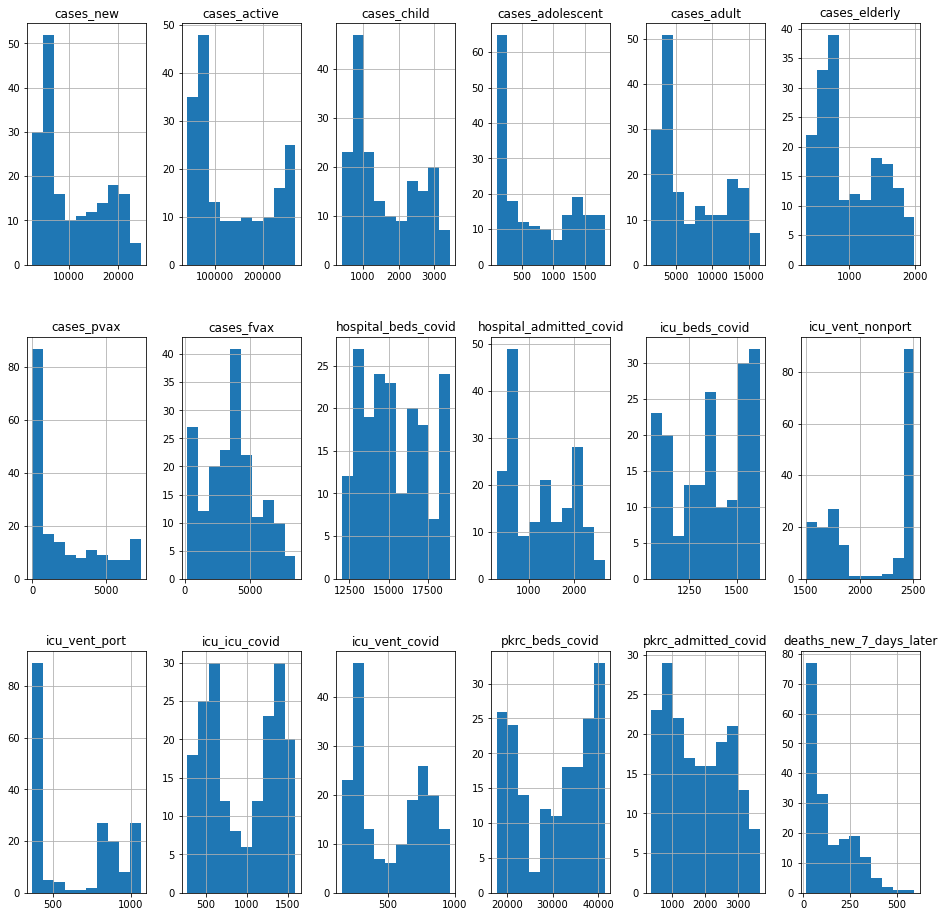

In [31]:
# A brief look on the distribution on the features that we have extracted
fig, axis = plt.subplots(3,6,figsize=(16, 16))
data.hist(ax=axis)
plt.show()

## Step 3: Perform train test split

In [32]:
# X_data (features) and Y_data (target)
X_data = data[data.columns[1:-1]]
Y_data = data[data.columns[-1]]

# Split data into holding data (70%) and testing data (30%)
X_hold, X_test, Y_hold, Y_test = train_test_split(X_data, Y_data, test_size = 0.3, random_state = 42)

# Split holding data into training data (50%) and validation data (50%)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_hold, Y_hold, test_size= 0.5)

## Step 4: Scaling (StandardScalar)

In [33]:
# Standard Scalar 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)

# Part B: Supervised Models:
1. Linear Regression
2. Neural Networks

## Step 1.1 Linear Regression

Reference:
1. https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression
2. https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn
3. https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

**Step 1: Set up the linear regression model, fit and predict.**
1. We will set up a linear regression model as the first step.
2. The model then will be fitted with X_train_scaled and Y_train.
3. Next, we will use the trained model to predict X_test_scaled.
4. Lastly, we will plot out a graph to visualize the difference between Y_test and the results we predict.

**Step 2: Hyperparameter Tuning**
1. We will tune the linear regression model using GridSearchCV, through the following hyperparameters:
- n_features_to_select (number of features to be selected)
2. The best hyperparameters will be obtained, and we will obtain new predicted values using the tuned model.

**Step 3: Performance Evaluation**
1. We will evaluate the linear regression model through the following metrics:
- MSE
- RMSE
- MAE

In [34]:
# Create an instance of the class
lr = LinearRegression()

# Start time
lr_start_time = time.time()

# Fit the instance on the data, train the model
lr = lr.fit(X_train_scaled, Y_train)

# End time
lr_end_time = time.time()

# Prediction on testing data
Y_LR_predict = lr.predict(X_test_scaled)

# Time taken
lr_time_used = lr_end_time - lr_start_time

# Display
print("Coefficient of determination, R Square\t:" , lr.score(X_test_scaled, Y_test))
print("\nIntercep (represent b0 in linear regression formula)\t:", lr.intercept_)
print("\nSlope (represent b1 and b2 in linear regression formula):\n", lr.coef_)

Coefficient of determination, R Square	: 0.7529160766748526

Intercep (represent b0 in linear regression formula)	: 147.921875

Slope (represent b1 and b2 in linear regression formula):
 [ 215.85621967 -112.48743686 -150.36617324  133.25425321  -97.11168992
   -1.11846409  -59.3247787   -40.36065573  123.66873095   32.06451051
  -50.59727234  100.2920803   148.6954272    75.31275764 -109.06581158
   10.37334893   49.5750476 ]


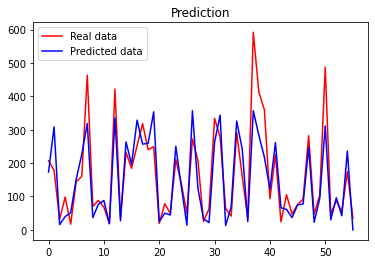

In [35]:
# Here, we plot a graph to look at the difference between the real death data and the predicted death data
plt.plot(Y_test.values, color = 'red', label = 'Real data')
plt.plot(Y_LR_predict, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

## Step 1.2 Hyperparameters Tuning

In [36]:
# Initiate KFold with 20 splits and random state of 50
folds = KFold(n_splits = 20, shuffle = True, random_state = 50)

# State the range of hyperparameters
hyper_para = [{'n_features_to_select': list(range(1, 18))}]

# State the model for hyperparameters tuning
lr = LinearRegression()

# Start time
md_start_time = time.time()

# fit the data into the model
lr = lr.fit(X_train_scaled, Y_train)
rfe = RFE(lr)

# set up for GridSearch CV function
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_para, 
                        scoring = 'r2', 
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

# fit the data into tuned model
md = model_cv.fit(X_train_scaled, Y_train)

# End time
md_end_time = time.time()

# Time taken
md_time_used = md_end_time - md_start_time

# Display
print("\nBest Parameters: ", md.best_params_)
print("\nCoefficient of determination: " , md.score(X_test_scaled, Y_test))

Fitting 20 folds for each of 17 candidates, totalling 340 fits

Best Parameters:  {'n_features_to_select': 11}

Coefficient of determination:  0.7544170905444259


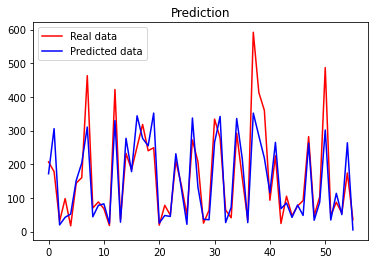

In [37]:
# Prediction on testing data with tuned model
Y_GS_predict = md.predict(X_test_scaled)

# Again, we plot a graph to look at the difference between the real death data and the predicted death data
plt.plot(Y_test.values, color = 'red', label = 'Real data')
plt.plot(Y_GS_predict, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [38]:
# Show cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split12_train_score,split13_train_score,split14_train_score,split15_train_score,split16_train_score,split17_train_score,split18_train_score,split19_train_score,mean_train_score,std_train_score
0,0.009220,0.001835,0.000399,0.000489,1,{'n_features_to_select': 1},0.785104,0.980663,0.750652,-0.057621,...,0.857195,0.841671,0.849514,0.843856,0.846158,0.848538,0.858295,0.847833,0.828005,0.053920
1,0.009219,0.001779,0.000400,0.000490,2,{'n_features_to_select': 2},0.794807,0.976384,0.772034,0.034102,...,0.859169,0.844157,0.850515,0.845590,0.848877,0.850389,0.863998,0.847858,0.837206,0.054819
2,0.007176,0.000677,0.000448,0.000495,3,{'n_features_to_select': 3},0.830710,0.968793,0.749009,-4.690213,...,0.876418,0.861532,0.867210,0.862605,0.864944,0.866203,0.878880,0.855080,0.870471,0.016550
3,0.006229,0.000697,0.000299,0.000457,4,{'n_features_to_select': 4},0.732248,0.968330,0.746605,-5.598665,...,0.878969,0.876680,0.867308,0.862636,0.865150,0.866205,0.879012,0.884947,0.876611,0.015864
4,0.005780,0.000617,0.000548,0.000496,5,{'n_features_to_select': 5},0.763036,0.952594,0.746197,-4.657780,...,0.907165,0.894732,0.871733,0.866747,0.868704,0.869091,0.881867,0.888211,0.883661,0.017422
5,0.005781,0.001359,0.000448,0.000496,6,{'n_features_to_select': 6},0.815129,0.948422,0.906887,-5.549001,...,0.916165,0.904357,0.893652,0.891819,0.894212,0.892970,0.899107,0.905620,0.898815,0.013101
6,0.006479,0.004816,0.000499,0.000590,7,{'n_features_to_select': 7},0.698153,0.922352,0.976363,-2.088038,...,0.916509,0.905987,0.905399,0.903654,0.904603,0.905192,0.909208,0.907349,0.907710,0.009572
7,0.004934,0.000970,0.000448,0.000495,8,{'n_features_to_select': 8},0.675134,0.840711,0.974392,-0.822336,...,0.924928,0.911933,0.906119,0.904298,0.905012,0.905723,0.910338,0.907350,0.912403,0.010246
8,0.004235,0.000619,0.000299,0.000457,9,{'n_features_to_select': 9},0.687133,0.830528,0.974564,-0.849106,...,0.925226,0.913152,0.906167,0.904371,0.905117,0.905740,0.910382,0.915223,0.913509,0.010657
9,0.003838,0.000651,0.000399,0.000489,10,{'n_features_to_select': 10},0.688416,0.833212,0.947867,-1.003529,...,0.932371,0.914026,0.913824,0.913696,0.912850,0.914041,0.919105,0.920758,0.918525,0.008841


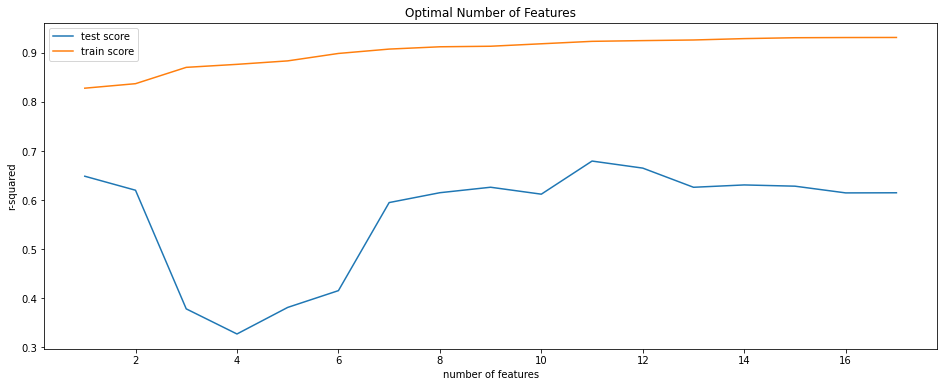

In [39]:
# plotting cross validation results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

## Step 1.3 Performance Evaluation

Reference: 
1. https://indatalabs.com/blog/predictive-models-performance-evaluation-important
2. https://machinelearningmastery.com/regression-metrics-for-machine-learning/
3. https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

### Time Used

In [40]:
# Time taken to train the linear regression model
print("Time used for the training of linear regression:\n", lr_time_used, " seconds or ", round(lr_time_used/60), " minutes")

# Time taken for the hyperparameters tuning of the linear regression model
print("\nTime taken for the hyperparameters tuning of the linear regression model:\n", md_time_used, 
      " seconds or ", round(md_time_used/60), " minutes")

Time used for the training of linear regression:
 0.0039861202239990234  seconds or  0  minutes

Time taken for the hyperparameters tuning of the linear regression model:
 1.9564590454101562  seconds or  0  minutes


### Mean Square Error

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset. The squaring also has the effect of inflating or magnifying large errors. That is, the larger the difference between the predicted and expected values, the larger the resulting squared positive error. This has the effect of “punishing” models more for larger errors when MSE is used as a loss function. It also has the effect of “punishing” models by inflating the average error score when used as a metric.

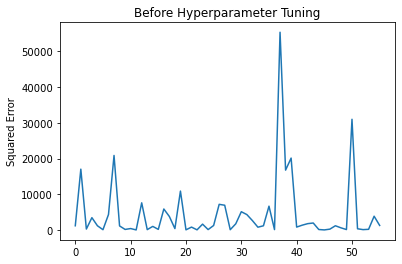

Mean square error before hyperparameters tuning:  4587.821433073013


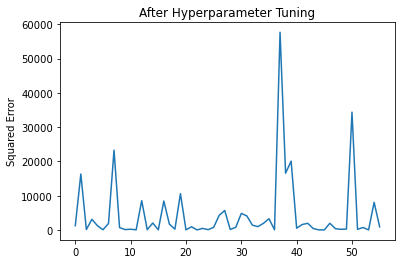

Mean square error after hyperparameters tuning:  4559.9508071355


In [41]:
# Recall what we have:
## We make the predictions based on: X_test_scaled
## Real values: Y_test
## Predicted values: nn_pred, nn_gs_pred

# Calculate the errors before and after hyperparameters tuning
errors_before = list()
errors_after = list()
for i in range(len(Y_test.values)):
    # Calculate error
    err_before = (Y_test.values[i] - Y_LR_predict[i])**2
    err_after = (Y_test.values[i] - Y_GS_predict[i])**2
    # Store error
    errors_before.append(err_before)
    errors_after.append(err_after)
    
    
# Plot the errors before hyperparameters tuning
plt.plot(errors_before)
plt.title("Before Hyperparameter Tuning")
#plt.xticks(ticks = [i for i in range(len(errors))], labels = nn_pred)
#plt.xlabel('Predicted Deaths')
plt.ylabel('Squared Error')
plt.show()

# Print the mean square error before hyperparameters tuning
lr_mse_before = mean_squared_error(Y_test.values, Y_LR_predict)
print("Mean square error before hyperparameters tuning: ", lr_mse_before)

# Plot the errors after hyperparameters tuning
plt.plot(errors_after)
plt.title("After Hyperparameter Tuning")
#plt.xticks(ticks = [i for i in range(len(errors))], labels = nn_pred)
#plt.xlabel('Predicted Deaths')
plt.ylabel('Squared Error')
plt.show()

# Print the mean square error after hyperparameters tuning
lr_mse_after = mean_squared_error(Y_test.values, Y_GS_predict)
print("Mean square error after hyperparameters tuning: ", lr_mse_after)

### Root Mean Square Error

The Root Mean Squared Error, or RMSE, is an extension of the mean squared error.

Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.

In [42]:
# Find RMSE
lr_rmse_before = mean_squared_error(Y_test.values, Y_LR_predict, squared = False)
lr_rmse_after = mean_squared_error(Y_test.values, Y_GS_predict, squared = False)
print("Root mean square error before hyperparameters tuning: ", lr_rmse_before)
print("Root mean square error after hyperparameters tuning: ", lr_rmse_after)

Root mean square error before hyperparameters tuning:  67.73345874140057
Root mean square error after hyperparameters tuning:  67.52740782182816


### Mean Absolute Error

Mean Absolute Error, or MAE, is a popular metric because, like RMSE, the units of the error score match the units of the target value that is being predicted.

Unlike the RMSE, the changes in MAE are linear and therefore intuitive.

That is, MSE and RMSE punish larger errors more than smaller errors, inflating or magnifying the mean error score. This is due to the square of the error value. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error.

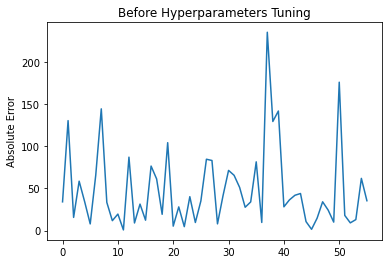

Mean absolute error:  48.314073334931436


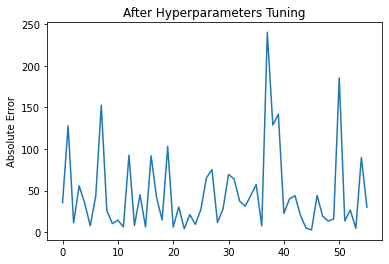

Mean absolute error:  46.527754893808336


In [43]:
# Calculate the errors
errors_before = list()
errors_after = list()
for i in range(len(Y_test.values)):
    # Calculate error
    err_before = abs((Y_test.values[i] - Y_LR_predict[i]))
    err_after = abs((Y_test.values[i] - Y_GS_predict[i]))
    # Store error
    errors_before.append(err_before)
    errors_after.append(err_after)
    
# Plot errors before hyperparameters tuning
plt.plot(errors_before)
plt.title("Before Hyperparameters Tuning")
#plt.xticks(ticks = [i for i in range(len(errors))], labels = nn_pred)
#plt.xlabel('Predicted Value')
plt.ylabel('Absolute Error')
plt.show()

# Print the mean absolute error before hyperparameters tuning
lr_mae_before = mean_absolute_error(Y_test.values, Y_LR_predict)
print("Mean absolute error: ", lr_mae_before)

# Plot errors after hyperparameters tuning
plt.plot(errors_after)
plt.title("After Hyperparameters Tuning")
#plt.xticks(ticks = [i for i in range(len(errors))], labels = nn_pred)
#plt.xlabel('Predicted Value')
plt.ylabel('Absolute Error')
plt.show()

# Print the mean absolute error after hyperparameters tuning
lr_mae_after = mean_absolute_error(Y_test.values, Y_GS_predict)
print("Mean absolute error: ", lr_mae_after)

## Step 2.1 Artificial Neural Networks (ANN)

Reference : 
1. https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
2. https://stackoverflow.com/questions/54749649/how-to-plot-epoch-vs-val-acc-and-epoch-vs-val-loss-graph-in-cnn

**Step 1: Set up the neural network model, fit and predict.**
1. We will set up a sequential model first and add the required layers. (Input Layer, 3 Hidden Layers, Output Layer)
2. Then, we will do a brief insight of the model we have currently.
3. Next, we will compile the model using 'rmsprop' as the optimizer and 'mean squared error' as the loss.
4. The model then will be fitted with X_train_scaled and Y_train.
5. We then visualize the loss for each epoch between training and validation.
6. We will use the model to predict X_test_scaled.
7. Lastly, we will plot out a graph to visualize the difference between Y_test and the results we predict.

**Step 2: Hyperparameter Tuning**
1. We will tune the neural network model using GridSearchCV, through the following hyperparameters:
- batch size
- number of epochs
- optimizer mode
2. The best hyperparameters will be obtained, and we will obtain new predicted values using the tuned model.

**Step 3: Performance Evaluation**
1. We will evaluate the neural network model through the following metrics:
- MSE
- RMSE
- MAE

In [44]:
# Initializing the ANN model
# We create a Sequential model and add layers one at a time until we are happy with our network architecture.
nnModel = Sequential() 

# Adding the input layer and the first hidden layer
nnModel.add(Dense(units = 32, activation = 'relu', input_dim = X_train_scaled.shape[1]))

# The term "dropout" is used for a technique which drops out some nodes of the network. 
# Dropping out can be seen as temporarily deactivating or ignoring neurons of the network. 
# This technique is applied in the training phase to reduce overfitting effects.
nnModel.add(Dropout(0.1))

# Adding the second hidden layer
nnModel.add(Dense(units = 32, activation = 'relu'))
nnModel.add(Dropout(0.1))

# Adding the third hidden layer
nnModel.add(Dense(units = 32, activation = 'relu'))
nnModel.add(Dropout(0.1))

# Adding the output layer
nnModel.add(Dense(units = 1))

In [45]:
# A brief summary of the model we currently have
nnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                576       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [46]:
# Compile the model
nnModel.compile(optimizer = 'rmsprop', loss = 'mean_squared_error') # We don't use metric = ['acc'] 
                                                                    # as we are not facing classification problem

In [47]:
# Fit the model

# Start time 
nn_start_time = time.time()

# Fit the model
history = nnModel.fit(X_train_scaled, Y_train, 
                      validation_data = (X_valid_scaled, Y_valid), 
                      batch_size = 10, epochs = 100, verbose = 0)

# End time
nn_end_time = time.time()

# Time taken
nn_time_used = nn_end_time - nn_start_time

print("Time used for the training of neural network: ", nn_time_used, " seconds or ", round(nn_time_used/60), " minutes")

Time used for the training of neural network:  3.015995979309082  seconds or  0  minutes


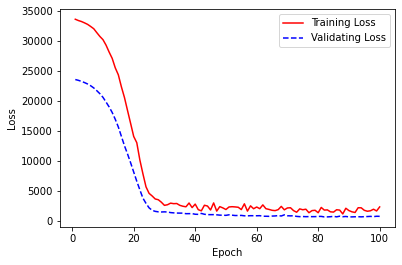

In [48]:
# Visualize epoch vs loss
training_loss = history.history['loss']
valid_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r-')
plt.plot(epoch_count, valid_loss, 'b--')
plt.legend(['Training Loss', 'Validating Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

The diagram above indicates that there does not exist any underfitting or overfitting.

In [49]:
# Now, we predict the X_test_scaled using the trained model
nn_pred = nnModel.predict(X_test_scaled)

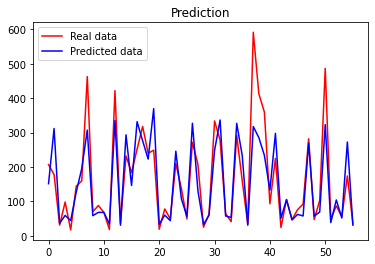

In [50]:
# Here, we plot a graph to look at the difference between the real death data and the predicted death data
plt.plot(Y_test.values, color = 'red', label = 'Real data')
plt.plot(nn_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

## Step 2.2 Hyperparameters Tuning

Reference : 
1. https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594
2. https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/

In [51]:
# Repeat some of the initial values here so we make sure they were not changed
input_dim = X_train_scaled.shape[1]
num_output = 1

# Create a function that creates the model (required for KerasRegressor) 
# while accepting the hyperparameters we want to tune 
def neural_network_model(Optimizer_trial): # Passing in some default values
    # Create the sequence model
    model = Sequential()
    
    # Add the input layer and the first hidden layer
    model.add(Dense(units = 32, kernel_initializer = 'normal', activation = 'relu', input_dim = X_train_scaled.shape[1]))
    model.add(Dropout(0.1)) # Prevent overfitting

    # Add center layer(s)
    model.add(Dense(units = 32, kernel_initializer = 'normal', activation = 'relu'))
    nnModel.add(Dropout(0.1))
    model.add(Dense(units = 32, kernel_initializer = 'normal', activation = 'relu'))
    nnModel.add(Dropout(0.1))
    
    # Add output layer
    model.add(Dense(units = 1, kernel_initializer='normal'))

    # Compile model
    model.compile(optimizer = Optimizer_trial, loss = 'mean_squared_error')

    return model

**Regarding batch-size:**

**1. Advantages of using a batch size < number of all samples:**

- It requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. That's especially important if you are not able to fit the whole dataset in your machine's memory.

- Typically networks train faster with mini-batches. That's because we update the weights after each propagation. In our example we've propagated 11 batches (10 of them had 100 samples and 1 had 50 samples) and after each of them we've updated our network's parameters. If we used all samples during propagation we would make only 1 update for the network's parameter.

**2. Disadvantages of using a batch size < number of all samples:**

- The smaller the batch the less accurate the estimate of the gradient will be. In the figure below, you can see that the direction of the mini-batch gradient (green color) fluctuates much more in comparison to the direction of the full batch gradient (blue color).


<img src="https://i.stack.imgur.com/lU3sx.png" alt="Drawing" style="width: 500px;"/>

In [52]:
 # Listing all the parameters to try
Parameter_Trials = {'batch_size': [10, 20, 30], # Mini-batch approach
                    'epochs': [i for i in range(0, 101, 20)],
                    'Optimizer_trial': ['adam', 'rmsprop']
                   }
 
# Creating the regression ANN model
RegModel = KerasRegressor(neural_network_model)

C:\Users\wclim\AppData\Local\Temp/ipykernel_9148/590413942.py:8: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  RegModel = KerasRegressor(neural_network_model)


In [53]:
# Defining a custom function to calculate accuracy
def Accuracy_Score(original, predicted):
    MAPE = np.mean(100 * (np.abs(original - predicted) / original))
    print('#'*70, 'Accuracy:', 100 - MAPE)
    
    return(100 - MAPE)

# Scoring for the GridSearchCV
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better = True)

# Measuring how much time it took to find the best params
start_time = time.time()

# Creating the Grid search space
nn_gs_model = GridSearchCV(estimator = RegModel, 
                           param_grid = Parameter_Trials, 
                           scoring = custom_Scoring, 
                           cv = 5)
 
# Running Grid Search for different paramenters
nn_gs_model.fit(X_train_scaled, Y_train, verbose = 1)
 
# End time
end_time = time.time()

# Time taken
nn_gs_time_taken = end_time - start_time
print("Total Time Taken: ", nn_gs_time_taken, " seconds or ", round((nn_gs_time_taken) / 60), " minutes")

# Print the best parameters
print("Best Parameters: ", nn_gs_model.best_params_)

###################################################################### Accuracy: 0.0003959014688064144
###################################################################### Accuracy: -0.0008719818520717126
###################################################################### Accuracy: 0.0002804927463415652
###################################################################### Accuracy: 0.0014526084678152529
###################################################################### Accuracy: -0.00033193403261577714
Epoch 1/20
6/6 [==============================] - 0s 1ms/step - loss: 30393.1250
Epoch 2/20
6/6 [==============================] - 0s 2ms/step - loss: 30388.6934
Epoch 3/20
6/6 [==============================] - 0s 2ms/step - loss: 30382.3145
Epoch 4/20
6/6 [==============================] - 0s 1ms/step - loss: 30371.7480
Epoch 5/20
6/6 [==============================] - 0s 2ms/step - loss: 30355.3457
Epoch 6/20
6/6 [==============================] - 0s 1ms/step - loss: 30324.7

6/6 [==============================] - 0s 800us/step - loss: 2799.5393
Epoch 28/40
6/6 [==============================] - 0s 996us/step - loss: 3296.0901
Epoch 29/40
6/6 [==============================] - 0s 797us/step - loss: 2907.9709
Epoch 30/40
6/6 [==============================] - 0s 797us/step - loss: 3041.7861
Epoch 31/40
6/6 [==============================] - 0s 997us/step - loss: 2828.7261
Epoch 32/40
6/6 [==============================] - 0s 997us/step - loss: 3113.7932
Epoch 33/40
6/6 [==============================] - 0s 798us/step - loss: 2697.2141
Epoch 34/40
6/6 [==============================] - 0s 996us/step - loss: 2665.1807
Epoch 35/40
6/6 [==============================] - 0s 996us/step - loss: 3037.5383
Epoch 36/40
6/6 [==============================] - 0s 797us/step - loss: 2431.8005
Epoch 37/40
6/6 [==============================] - 0s 797us/step - loss: 2261.6545
Epoch 38/40
6/6 [==============================] - 0s 797us/step - loss: 2567.8645
Epoch 39/40
6/6 

6/6 [==============================] - 0s 871us/step - loss: 35768.1914
Epoch 3/40
6/6 [==============================] - 0s 997us/step - loss: 35760.3906
Epoch 4/40
6/6 [==============================] - 0s 1ms/step - loss: 35745.5664
Epoch 5/40
6/6 [==============================] - 0s 997us/step - loss: 35714.7422
Epoch 6/40
6/6 [==============================] - 0s 996us/step - loss: 35662.5391
Epoch 7/40
6/6 [==============================] - 0s 797us/step - loss: 35554.2227
Epoch 8/40
6/6 [==============================] - 0s 797us/step - loss: 35380.3828
Epoch 9/40
6/6 [==============================] - 0s 997us/step - loss: 35102.0742
Epoch 10/40
6/6 [==============================] - 0s 797us/step - loss: 34640.8047
Epoch 11/40
6/6 [==============================] - 0s 797us/step - loss: 33930.3594
Epoch 12/40
6/6 [==============================] - 0s 799us/step - loss: 32911.1289
Epoch 13/40
6/6 [==============================] - 0s 997us/step - loss: 31558.1875
Epoch 14/40
6

6/6 [==============================] - 0s 797us/step - loss: 2493.0496
Epoch 36/60
6/6 [==============================] - 0s 797us/step - loss: 2247.3857
Epoch 37/60
6/6 [==============================] - 0s 997us/step - loss: 2175.5408
Epoch 38/60
6/6 [==============================] - 0s 997us/step - loss: 2252.0112
Epoch 39/60
6/6 [==============================] - 0s 797us/step - loss: 2070.7034
Epoch 40/60
6/6 [==============================] - 0s 996us/step - loss: 2196.1284
Epoch 41/60
6/6 [==============================] - 0s 797us/step - loss: 1837.0330
Epoch 42/60
6/6 [==============================] - 0s 997us/step - loss: 1848.6592
Epoch 43/60
6/6 [==============================] - 0s 798us/step - loss: 1605.9327
Epoch 44/60
6/6 [==============================] - 0s 797us/step - loss: 2232.5535
Epoch 45/60
6/6 [==============================] - 0s 797us/step - loss: 2113.4297
Epoch 46/60
6/6 [==============================] - 0s 797us/step - loss: 2067.7366
Epoch 47/60
6/6 

6/6 [==============================] - 0s 797us/step - loss: 2401.2000
Epoch 49/80
6/6 [==============================] - 0s 797us/step - loss: 2103.9663
Epoch 50/80
6/6 [==============================] - 0s 797us/step - loss: 2319.7756
Epoch 51/80
6/6 [==============================] - 0s 797us/step - loss: 2464.9751
Epoch 52/80
6/6 [==============================] - 0s 997us/step - loss: 2686.5762
Epoch 53/80
6/6 [==============================] - 0s 797us/step - loss: 2195.5796
Epoch 54/80
6/6 [==============================] - 0s 797us/step - loss: 2594.1492
Epoch 55/80
6/6 [==============================] - 0s 797us/step - loss: 2307.8374
Epoch 56/80
6/6 [==============================] - 0s 797us/step - loss: 2665.0857
Epoch 57/80
6/6 [==============================] - 0s 997us/step - loss: 1867.3798
Epoch 58/80
6/6 [==============================] - 0s 797us/step - loss: 2105.1079
Epoch 59/80
6/6 [==============================] - 0s 797us/step - loss: 2156.8435
Epoch 60/80
6/6 

6/6 [==============================] - 0s 1ms/step - loss: 32476.3496
Epoch 2/80
6/6 [==============================] - 0s 997us/step - loss: 32472.3105
Epoch 3/80
6/6 [==============================] - 0s 991us/step - loss: 32466.3438
Epoch 4/80
6/6 [==============================] - 0s 797us/step - loss: 32456.8340
Epoch 5/80
6/6 [==============================] - 0s 797us/step - loss: 32439.1543
Epoch 6/80
6/6 [==============================] - 0s 997us/step - loss: 32412.2090
Epoch 7/80
6/6 [==============================] - 0s 797us/step - loss: 32359.0684
Epoch 8/80
6/6 [==============================] - 0s 797us/step - loss: 32277.4980
Epoch 9/80
6/6 [==============================] - 0s 797us/step - loss: 32158.8164
Epoch 10/80
6/6 [==============================] - 0s 797us/step - loss: 31987.0898
Epoch 11/80
6/6 [==============================] - 0s 1ms/step - loss: 31668.5801
Epoch 12/80
6/6 [==============================] - 0s 797us/step - loss: 31221.8281
Epoch 13/80
6/6 

6/6 [==============================] - 0s 797us/step - loss: 2388.9751
Epoch 37/100
6/6 [==============================] - 0s 996us/step - loss: 2753.8831
Epoch 38/100
6/6 [==============================] - 0s 797us/step - loss: 2497.6335
Epoch 39/100
6/6 [==============================] - 0s 797us/step - loss: 2820.3450
Epoch 40/100
6/6 [==============================] - 0s 997us/step - loss: 2430.0925
Epoch 41/100
6/6 [==============================] - 0s 798us/step - loss: 2795.7388
Epoch 42/100
6/6 [==============================] - 0s 797us/step - loss: 2315.5723
Epoch 43/100
6/6 [==============================] - 0s 996us/step - loss: 2766.8169
Epoch 44/100
6/6 [==============================] - 0s 798us/step - loss: 2694.1670
Epoch 45/100
6/6 [==============================] - 0s 997us/step - loss: 2913.0049
Epoch 46/100
6/6 [==============================] - 0s 797us/step - loss: 2422.4470
Epoch 47/100
6/6 [==============================] - 0s 799us/step - loss: 2120.0139
Epoch

6/6 [==============================] - 0s 797us/step - loss: 2898.1055
Epoch 29/100
6/6 [==============================] - 0s 797us/step - loss: 2265.1445
Epoch 30/100
6/6 [==============================] - 0s 797us/step - loss: 2125.7378
Epoch 31/100
6/6 [==============================] - 0s 997us/step - loss: 2135.1592
Epoch 32/100
6/6 [==============================] - 0s 797us/step - loss: 2262.4668
Epoch 33/100
6/6 [==============================] - 0s 797us/step - loss: 2053.2744
Epoch 34/100
6/6 [==============================] - 0s 797us/step - loss: 2024.5272
Epoch 35/100
6/6 [==============================] - 0s 797us/step - loss: 2179.2979
Epoch 36/100
6/6 [==============================] - 0s 797us/step - loss: 2219.3604
Epoch 37/100
6/6 [==============================] - 0s 997us/step - loss: 2181.7559
Epoch 38/100
6/6 [==============================] - 0s 797us/step - loss: 2001.5848
Epoch 39/100
6/6 [==============================] - 0s 797us/step - loss: 2008.5918
Epoch

6/6 [==============================] - 0s 797us/step - loss: 18943.9336
Epoch 21/100
6/6 [==============================] - 0s 799us/step - loss: 14956.4688
Epoch 22/100
6/6 [==============================] - 0s 999us/step - loss: 11660.1562
Epoch 23/100
6/6 [==============================] - 0s 797us/step - loss: 7749.0210
Epoch 24/100
6/6 [==============================] - 0s 797us/step - loss: 5762.9253
Epoch 25/100
6/6 [==============================] - 0s 797us/step - loss: 3675.6172
Epoch 26/100
6/6 [==============================] - 0s 996us/step - loss: 2669.3450
Epoch 27/100
6/6 [==============================] - 0s 997us/step - loss: 2757.7822
Epoch 28/100
6/6 [==============================] - 0s 997us/step - loss: 3163.6128
Epoch 29/100
6/6 [==============================] - 0s 797us/step - loss: 3129.6658
Epoch 30/100
6/6 [==============================] - 0s 598us/step - loss: 2791.2812
Epoch 31/100
6/6 [==============================] - 0s 996us/step - loss: 2803.9011
Ep

3/3 [==============================] - 0s 2ms/step - loss: 30389.9121
Epoch 4/40
3/3 [==============================] - 0s 997us/step - loss: 30387.8438
Epoch 5/40
3/3 [==============================] - 0s 996us/step - loss: 30384.9102
Epoch 6/40
3/3 [==============================] - 0s 998us/step - loss: 30380.7715
Epoch 7/40
3/3 [==============================] - 0s 996us/step - loss: 30375.4590
Epoch 8/40
3/3 [==============================] - 0s 1ms/step - loss: 30367.5898
Epoch 9/40
3/3 [==============================] - 0s 997us/step - loss: 30359.0293
Epoch 10/40
3/3 [==============================] - 0s 997us/step - loss: 30345.9785
Epoch 11/40
3/3 [==============================] - 0s 997us/step - loss: 30327.0977
Epoch 12/40
3/3 [==============================] - 0s 1000us/step - loss: 30301.1465
Epoch 13/40
3/3 [==============================] - 0s 997us/step - loss: 30268.5586
Epoch 14/40
3/3 [==============================] - 0s 997us/step - loss: 30224.8848
Epoch 15/40
3

3/3 [==============================] - 0s 997us/step - loss: 23974.1113
Epoch 36/40
3/3 [==============================] - 0s 1ms/step - loss: 22147.1738
Epoch 37/40
3/3 [==============================] - 0s 997us/step - loss: 20577.8555
Epoch 38/40
3/3 [==============================] - 0s 1ms/step - loss: 19105.6641
Epoch 39/40
3/3 [==============================] - 0s 998us/step - loss: 16800.2480
Epoch 40/40
3/3 [==============================] - 0s 1ms/step - loss: 15062.8398
###################################################################### Accuracy: 37.96032038030251
Epoch 1/60
3/3 [==============================] - 0s 1ms/step - loss: 30393.1543
Epoch 2/60
3/3 [==============================] - 0s 2ms/step - loss: 30390.7148
Epoch 3/60
3/3 [==============================] - 0s 996us/step - loss: 30387.4941
Epoch 4/60
3/3 [==============================] - 0s 1ms/step - loss: 30383.5273
Epoch 5/60
3/3 [==============================] - 0s 1ms/step - loss: 30376.8105
Epoch 6/

Epoch 32/60
3/3 [==============================] - 0s 997us/step - loss: 19889.0527
Epoch 33/60
3/3 [==============================] - 0s 1ms/step - loss: 18460.6895
Epoch 34/60
3/3 [==============================] - 0s 1ms/step - loss: 16176.7510
Epoch 35/60
3/3 [==============================] - 0s 997us/step - loss: 13864.0400
Epoch 36/60
3/3 [==============================] - 0s 989us/step - loss: 12526.6328
Epoch 37/60
3/3 [==============================] - 0s 997us/step - loss: 11345.7461
Epoch 38/60
3/3 [==============================] - 0s 996us/step - loss: 9405.2012
Epoch 39/60
3/3 [==============================] - 0s 996us/step - loss: 7406.3628
Epoch 40/60
3/3 [==============================] - 0s 1ms/step - loss: 6120.1211
Epoch 41/60
3/3 [==============================] - 0s 1ms/step - loss: 4873.1582
Epoch 42/60
3/3 [==============================] - 0s 997us/step - loss: 3982.1479
Epoch 43/60
3/3 [==============================] - 0s 1ms/step - loss: 3825.1636
Epoch 44

3/3 [==============================] - 0s 997us/step - loss: 32424.6934
Epoch 10/60
3/3 [==============================] - 0s 1ms/step - loss: 32404.9688
Epoch 11/60
3/3 [==============================] - 0s 1ms/step - loss: 32373.0781
Epoch 12/60
3/3 [==============================] - 0s 997us/step - loss: 32335.0977
Epoch 13/60
3/3 [==============================] - 0s 1ms/step - loss: 32287.1406
Epoch 14/60
3/3 [==============================] - 0s 1ms/step - loss: 32215.7754
Epoch 15/60
3/3 [==============================] - 0s 1ms/step - loss: 32121.8633
Epoch 16/60
3/3 [==============================] - 0s 1ms/step - loss: 32019.0117
Epoch 17/60
3/3 [==============================] - 0s 1ms/step - loss: 31841.5215
Epoch 18/60
3/3 [==============================] - 0s 996us/step - loss: 31659.9551
Epoch 19/60
3/3 [==============================] - 0s 997us/step - loss: 31394.0000
Epoch 20/60
3/3 [==============================] - 0s 1ms/step - loss: 31068.7383
Epoch 21/60
3/3 [===

3/3 [==============================] - 0s 3ms/step - loss: 32036.1953
Epoch 5/80
3/3 [==============================] - 0s 2ms/step - loss: 32032.7227
Epoch 6/80
3/3 [==============================] - 0s 1ms/step - loss: 32027.9023
Epoch 7/80
3/3 [==============================] - 0s 2ms/step - loss: 32021.7715
Epoch 8/80
3/3 [==============================] - 0s 2ms/step - loss: 32013.9121
Epoch 9/80
3/3 [==============================] - 0s 3ms/step - loss: 32003.0996
Epoch 10/80
3/3 [==============================] - 0s 2ms/step - loss: 31988.5508
Epoch 11/80
3/3 [==============================] - 0s 3ms/step - loss: 31970.0938
Epoch 12/80
3/3 [==============================] - 0s 3ms/step - loss: 31942.0547
Epoch 13/80
3/3 [==============================] - 0s 2ms/step - loss: 31904.2852
Epoch 14/80
3/3 [==============================] - 0s 2ms/step - loss: 31852.7012
Epoch 15/80
3/3 [==============================] - 0s 2ms/step - loss: 31801.2344
Epoch 16/80
3/3 [================

3/3 [==============================] - 0s 1ms/step - loss: 5542.1699
Epoch 43/80
3/3 [==============================] - 0s 1ms/step - loss: 4661.1929
Epoch 44/80
3/3 [==============================] - 0s 1ms/step - loss: 3183.9834
Epoch 45/80
3/3 [==============================] - 0s 1ms/step - loss: 2949.8157
Epoch 46/80
3/3 [==============================] - 0s 2ms/step - loss: 2262.5356
Epoch 47/80
3/3 [==============================] - 0s 2ms/step - loss: 2129.8171
Epoch 48/80
3/3 [==============================] - 0s 1ms/step - loss: 1891.9109
Epoch 49/80
3/3 [==============================] - 0s 1ms/step - loss: 2278.7097
Epoch 50/80
3/3 [==============================] - 0s 1ms/step - loss: 1947.0654
Epoch 51/80
3/3 [==============================] - 0s 2ms/step - loss: 2325.2241
Epoch 52/80
3/3 [==============================] - 0s 2ms/step - loss: 2195.6128
Epoch 53/80
3/3 [==============================] - 0s 1ms/step - loss: 2201.5554
Epoch 54/80
3/3 [=======================

3/3 [==============================] - 0s 998us/step - loss: 2192.4341
Epoch 80/100
3/3 [==============================] - 0s 1ms/step - loss: 2481.4932
Epoch 81/100
3/3 [==============================] - 0s 996us/step - loss: 2474.4517
Epoch 82/100
3/3 [==============================] - 0s 1ms/step - loss: 1969.5031
Epoch 83/100
3/3 [==============================] - 0s 997us/step - loss: 2137.8005
Epoch 84/100
3/3 [==============================] - 0s 1ms/step - loss: 1924.2653
Epoch 85/100
3/3 [==============================] - 0s 1ms/step - loss: 2664.1294
Epoch 86/100
3/3 [==============================] - 0s 997us/step - loss: 1794.7520
Epoch 87/100
3/3 [==============================] - 0s 997us/step - loss: 2404.3655
Epoch 88/100
3/3 [==============================] - 0s 997us/step - loss: 2197.3381
Epoch 89/100
3/3 [==============================] - 0s 997us/step - loss: 2344.9226
Epoch 90/100
3/3 [==============================] - 0s 996us/step - loss: 2240.0479
Epoch 91/100


3/3 [==============================] - 0s 997us/step - loss: 2065.5640
Epoch 74/100
3/3 [==============================] - 0s 1ms/step - loss: 2054.8159
Epoch 75/100
3/3 [==============================] - 0s 997us/step - loss: 2071.5532
Epoch 76/100
3/3 [==============================] - 0s 997us/step - loss: 1491.5386
Epoch 77/100
3/3 [==============================] - 0s 1ms/step - loss: 2111.9453
Epoch 78/100
3/3 [==============================] - 0s 997us/step - loss: 2152.1128
Epoch 79/100
3/3 [==============================] - 0s 1ms/step - loss: 2222.6072
Epoch 80/100
3/3 [==============================] - 0s 997us/step - loss: 2012.6923
Epoch 81/100
3/3 [==============================] - 0s 997us/step - loss: 2015.8040
Epoch 82/100
3/3 [==============================] - 0s 997us/step - loss: 1902.2021
Epoch 83/100
3/3 [==============================] - 0s 996us/step - loss: 1824.1066
Epoch 84/100
3/3 [==============================] - 0s 1ms/step - loss: 2229.1458
Epoch 85/100


3/3 [==============================] - 0s 996us/step - loss: 2379.9312
Epoch 68/100
3/3 [==============================] - 0s 997us/step - loss: 2998.9736
Epoch 69/100
3/3 [==============================] - 0s 1ms/step - loss: 2245.2268
Epoch 70/100
3/3 [==============================] - 0s 997us/step - loss: 2659.3655
Epoch 71/100
3/3 [==============================] - 0s 1ms/step - loss: 2702.8608
Epoch 72/100
3/3 [==============================] - 0s 996us/step - loss: 1876.1913
Epoch 73/100
3/3 [==============================] - 0s 1ms/step - loss: 2014.4913
Epoch 74/100
3/3 [==============================] - 0s 991us/step - loss: 2688.6108
Epoch 75/100
3/3 [==============================] - 0s 1ms/step - loss: 2612.2668
Epoch 76/100
3/3 [==============================] - 0s 1ms/step - loss: 2304.9807
Epoch 77/100
3/3 [==============================] - 0s 997us/step - loss: 2613.2900
Epoch 78/100
3/3 [==============================] - 0s 1ms/step - loss: 2297.6016
Epoch 79/100
3/3 

2/2 [==============================] - 0s 2ms/step - loss: 32018.3340
Epoch 11/40
2/2 [==============================] - 0s 2ms/step - loss: 32012.5898
Epoch 12/40
2/2 [==============================] - 0s 995us/step - loss: 32004.7598
Epoch 13/40
2/2 [==============================] - 0s 997us/step - loss: 31995.9844
Epoch 14/40
2/2 [==============================] - 0s 996us/step - loss: 31985.9297
Epoch 15/40
2/2 [==============================] - 0s 2ms/step - loss: 31969.7598
Epoch 16/40
2/2 [==============================] - 0s 2ms/step - loss: 31956.3242
Epoch 17/40
2/2 [==============================] - 0s 2ms/step - loss: 31931.1953
Epoch 18/40
2/2 [==============================] - 0s 1ms/step - loss: 31908.5059
Epoch 19/40
2/2 [==============================] - 0s 2ms/step - loss: 31879.1758
Epoch 20/40
2/2 [==============================] - 0s 1ms/step - loss: 31839.4355
Epoch 21/40
2/2 [==============================] - 0s 2ms/step - loss: 31795.7754
Epoch 22/40
2/2 [=====

Epoch 44/60
2/2 [==============================] - 0s 997us/step - loss: 20758.4688
Epoch 45/60
2/2 [==============================] - 0s 996us/step - loss: 19387.0371
Epoch 46/60
2/2 [==============================] - 0s 997us/step - loss: 18342.4102
Epoch 47/60
2/2 [==============================] - 0s 2ms/step - loss: 17328.1191
Epoch 48/60
2/2 [==============================] - 0s 2ms/step - loss: 15940.9863
Epoch 49/60
2/2 [==============================] - 0s 2ms/step - loss: 14770.5879
Epoch 50/60
2/2 [==============================] - 0s 996us/step - loss: 13664.9893
Epoch 51/60
2/2 [==============================] - 0s 2ms/step - loss: 12282.1543
Epoch 52/60
2/2 [==============================] - 0s 2ms/step - loss: 11202.4316
Epoch 53/60
2/2 [==============================] - 0s 2ms/step - loss: 10261.6113
Epoch 54/60
2/2 [==============================] - 0s 1ms/step - loss: 8773.9414
Epoch 55/60
2/2 [==============================] - 0s 997us/step - loss: 8579.4600
Epoch 56

2/2 [==============================] - 0s 2ms/step - loss: 5051.7139
Epoch 60/60
2/2 [==============================] - 0s 997us/step - loss: 4201.0747
###################################################################### Accuracy: 43.78822303104859
Epoch 1/60
2/2 [==============================] - 0s 2ms/step - loss: 35775.1250
Epoch 2/60
2/2 [==============================] - 0s 2ms/step - loss: 35773.4453
Epoch 3/60
2/2 [==============================] - 0s 2ms/step - loss: 35771.7109
Epoch 4/60
2/2 [==============================] - 0s 2ms/step - loss: 35769.7695
Epoch 5/60
2/2 [==============================] - 0s 2ms/step - loss: 35767.5195
Epoch 6/60
2/2 [==============================] - 0s 2ms/step - loss: 35764.9727
Epoch 7/60
2/2 [==============================] - 0s 997us/step - loss: 35761.4453
Epoch 8/60
2/2 [==============================] - 0s 2ms/step - loss: 35757.7773
Epoch 9/60
2/2 [==============================] - 0s 2ms/step - loss: 35752.8125
Epoch 10/60
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 26081.2305
Epoch 37/80
2/2 [==============================] - 0s 996us/step - loss: 25372.7051
Epoch 38/80
2/2 [==============================] - 0s 2ms/step - loss: 24720.8926
Epoch 39/80
2/2 [==============================] - 0s 997us/step - loss: 24014.0449
Epoch 40/80
2/2 [==============================] - 0s 2ms/step - loss: 23423.5195
Epoch 41/80
2/2 [==============================] - 0s 2ms/step - loss: 22472.5703
Epoch 42/80
2/2 [==============================] - 0s 996us/step - loss: 22027.0996
Epoch 43/80
2/2 [==============================] - 0s 996us/step - loss: 20527.7598
Epoch 44/80
2/2 [==============================] - 0s 2ms/step - loss: 19975.9980
Epoch 45/80
2/2 [==============================] - 0s 2ms/step - loss: 18551.7988
Epoch 46/80
2/2 [==============================] - 0s 2ms/step - loss: 17431.7793
Epoch 47/80
2/2 [==============================] - 0s 2ms/step - loss: 16320.2969
Epoch 48/80
2/2 [===

Epoch 73/80
2/2 [==============================] - 0s 2ms/step - loss: 1856.7368
Epoch 74/80
2/2 [==============================] - 0s 998us/step - loss: 2227.3357
Epoch 75/80
2/2 [==============================] - 0s 998us/step - loss: 2331.5098
Epoch 76/80
2/2 [==============================] - 0s 2ms/step - loss: 1896.3276
Epoch 77/80
2/2 [==============================] - 0s 2ms/step - loss: 2625.9456
Epoch 78/80
2/2 [==============================] - 0s 997us/step - loss: 2293.6675
Epoch 79/80
2/2 [==============================] - 0s 2ms/step - loss: 2462.7700
Epoch 80/80
2/2 [==============================] - 0s 1ms/step - loss: 2483.0496
###################################################################### Accuracy: 44.51434670988297
Epoch 1/80
2/2 [==============================] - 0s 2ms/step - loss: 32477.6328
Epoch 2/80
2/2 [==============================] - 0s 999us/step - loss: 32476.0215
Epoch 3/80
2/2 [==============================] - 0s 2ms/step - loss: 32474.8145
Ep

2/2 [==============================] - 0s 2ms/step - loss: 29548.4121
Epoch 29/100
2/2 [==============================] - 0s 998us/step - loss: 29405.2148
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 29237.2109
Epoch 31/100
2/2 [==============================] - 0s 2ms/step - loss: 29017.2207
Epoch 32/100
2/2 [==============================] - 0s 998us/step - loss: 28821.8828
Epoch 33/100
2/2 [==============================] - 0s 2ms/step - loss: 28572.9980
Epoch 34/100
2/2 [==============================] - 0s 2ms/step - loss: 28250.8926
Epoch 35/100
2/2 [==============================] - 0s 2ms/step - loss: 27908.2441
Epoch 36/100
2/2 [==============================] - 0s 206ms/step - loss: 27668.6250
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 27185.9551
Epoch 38/100
2/2 [==============================] - 0s 2ms/step - loss: 26693.5996
Epoch 39/100
2/2 [==============================] - 0s 1ms/step - loss: 26416.2988
Epoch 40/10

2/2 [==============================] - 0s 996us/step - loss: 36760.1875
Epoch 23/100
2/2 [==============================] - 0s 2ms/step - loss: 36669.9102
Epoch 24/100
2/2 [==============================] - 0s 2ms/step - loss: 36533.1367
Epoch 25/100
2/2 [==============================] - 0s 997us/step - loss: 36372.1719
Epoch 26/100
2/2 [==============================] - 0s 2ms/step - loss: 36216.8047
Epoch 27/100
2/2 [==============================] - 0s 996us/step - loss: 35976.3477
Epoch 28/100
2/2 [==============================] - 0s 2ms/step - loss: 35794.3203
Epoch 29/100
2/2 [==============================] - 0s 1ms/step - loss: 35507.3867
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 35174.3438
Epoch 31/100
2/2 [==============================] - 0s 2ms/step - loss: 34722.6914
Epoch 32/100
2/2 [==============================] - 0s 997us/step - loss: 34354.4023
Epoch 33/100
2/2 [==============================] - 0s 997us/step - loss: 33830.4141
Epoch 3

2/2 [==============================] - 0s 997us/step - loss: 35723.7930
Epoch 17/100
2/2 [==============================] - 0s 3ms/step - loss: 35712.2070
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 35700.4531
Epoch 19/100
2/2 [==============================] - 0s 2ms/step - loss: 35684.3750
Epoch 20/100
2/2 [==============================] - 0s 1ms/step - loss: 35663.3398
Epoch 21/100
2/2 [==============================] - 0s 2ms/step - loss: 35644.6055
Epoch 22/100
2/2 [==============================] - 0s 1ms/step - loss: 35606.8906
Epoch 23/100
2/2 [==============================] - 0s 996us/step - loss: 35570.3281
Epoch 24/100
2/2 [==============================] - 0s 1ms/step - loss: 35529.6250
Epoch 25/100
2/2 [==============================] - 0s 2ms/step - loss: 35482.7695
Epoch 26/100
2/2 [==============================] - 0s 1ms/step - loss: 35421.4023
Epoch 27/100
2/2 [==============================] - 0s 997us/step - loss: 35355.3359
Epoch 28/10

6/6 [==============================] - 0s 797us/step - loss: 17611.1543
###################################################################### Accuracy: 37.976964978812994
Epoch 1/40
6/6 [==============================] - 0s 1ms/step - loss: 30387.3926
Epoch 2/40
6/6 [==============================] - 0s 995us/step - loss: 30359.9121
Epoch 3/40
6/6 [==============================] - 0s 1ms/step - loss: 30302.2656
Epoch 4/40
6/6 [==============================] - 0s 998us/step - loss: 30206.0547
Epoch 5/40
6/6 [==============================] - 0s 797us/step - loss: 30036.0586
Epoch 6/40
6/6 [==============================] - 0s 997us/step - loss: 29817.0586
Epoch 7/40
6/6 [==============================] - 0s 997us/step - loss: 29529.6328
Epoch 8/40
6/6 [==============================] - 0s 798us/step - loss: 29101.9922
Epoch 9/40
6/6 [==============================] - 0s 796us/step - loss: 28624.7188
Epoch 10/40
6/6 [==============================] - 0s 797us/step - loss: 27808.3691
E

6/6 [==============================] - 0s 800us/step - loss: 5509.4531
Epoch 31/40
6/6 [==============================] - 0s 797us/step - loss: 4823.6406
Epoch 32/40
6/6 [==============================] - 0s 797us/step - loss: 4002.8943
Epoch 33/40
6/6 [==============================] - 0s 997us/step - loss: 3002.7925
Epoch 34/40
6/6 [==============================] - 0s 797us/step - loss: 2694.0430
Epoch 35/40
6/6 [==============================] - 0s 797us/step - loss: 2620.5613
Epoch 36/40
6/6 [==============================] - 0s 799us/step - loss: 2655.3618
Epoch 37/40
6/6 [==============================] - 0s 997us/step - loss: 2631.1812
Epoch 38/40
6/6 [==============================] - 0s 997us/step - loss: 2369.3079
Epoch 39/40
6/6 [==============================] - 0s 797us/step - loss: 2245.8701
Epoch 40/40
6/6 [==============================] - 0s 797us/step - loss: 2833.0439
###################################################################### Accuracy: 72.84447898399524


6/6 [==============================] - 0s 994us/step - loss: 32456.5254
Epoch 3/60
6/6 [==============================] - 0s 799us/step - loss: 32426.1426
Epoch 4/60
6/6 [==============================] - 0s 797us/step - loss: 32372.1328
Epoch 5/60
6/6 [==============================] - 0s 797us/step - loss: 32313.5586
Epoch 6/60
6/6 [==============================] - 0s 797us/step - loss: 32204.2109
Epoch 7/60
6/6 [==============================] - 0s 797us/step - loss: 32068.4844
Epoch 8/60
6/6 [==============================] - 0s 997us/step - loss: 31832.7188
Epoch 9/60
6/6 [==============================] - 0s 797us/step - loss: 31580.7871
Epoch 10/60
6/6 [==============================] - 0s 797us/step - loss: 31213.2891
Epoch 11/60
6/6 [==============================] - 0s 799us/step - loss: 30784.4102
Epoch 12/60
6/6 [==============================] - 0s 798us/step - loss: 30248.2402
Epoch 13/60
6/6 [==============================] - 0s 797us/step - loss: 29655.5000
Epoch 14/60

6/6 [==============================] - 0s 797us/step - loss: 2379.4043
Epoch 77/80
6/6 [==============================] - 0s 797us/step - loss: 1806.9933
Epoch 78/80
6/6 [==============================] - 0s 797us/step - loss: 2018.4020
Epoch 79/80
6/6 [==============================] - 0s 798us/step - loss: 1906.4349
Epoch 80/80
6/6 [==============================] - 0s 997us/step - loss: 1873.6820
###################################################################### Accuracy: 63.68822793528706
Epoch 1/80
6/6 [==============================] - 0s 1ms/step - loss: 32038.2227
Epoch 2/80
6/6 [==============================] - 0s 797us/step - loss: 32016.3652
Epoch 3/80
6/6 [==============================] - 0s 997us/step - loss: 31977.2246
Epoch 4/80
6/6 [==============================] - 0s 996us/step - loss: 31896.2891
Epoch 5/80
6/6 [==============================] - 0s 997us/step - loss: 31785.5176
Epoch 6/80
6/6 [==============================] - 0s 797us/step - loss: 31612.8906
Ep

6/6 [==============================] - 0s 997us/step - loss: 2663.6907
Epoch 32/80
6/6 [==============================] - 0s 1ms/step - loss: 2927.2515
Epoch 33/80
6/6 [==============================] - 0s 997us/step - loss: 2536.0850
Epoch 34/80
6/6 [==============================] - 0s 997us/step - loss: 2877.4473
Epoch 35/80
6/6 [==============================] - 0s 797us/step - loss: 2600.6426
Epoch 36/80
6/6 [==============================] - 0s 796us/step - loss: 2311.4214
Epoch 37/80
6/6 [==============================] - 0s 999us/step - loss: 2134.5994
Epoch 38/80
6/6 [==============================] - 0s 998us/step - loss: 2210.9932
Epoch 39/80
6/6 [==============================] - 0s 1ms/step - loss: 2264.1660
Epoch 40/80
6/6 [==============================] - 0s 1ms/step - loss: 2262.1848
Epoch 41/80
6/6 [==============================] - 0s 997us/step - loss: 2076.7507
Epoch 42/80
6/6 [==============================] - 0s 1ms/step - loss: 2199.7690
Epoch 43/80
6/6 [=======

6/6 [==============================] - 0s 797us/step - loss: 2424.0435
Epoch 67/100
6/6 [==============================] - 0s 798us/step - loss: 1895.0204
Epoch 68/100
6/6 [==============================] - 0s 797us/step - loss: 2061.7363
Epoch 69/100
6/6 [==============================] - 0s 797us/step - loss: 2521.5935
Epoch 70/100
6/6 [==============================] - 0s 797us/step - loss: 2206.9207
Epoch 71/100
6/6 [==============================] - 0s 999us/step - loss: 1758.2206
Epoch 72/100
6/6 [==============================] - 0s 797us/step - loss: 1995.5614
Epoch 73/100
6/6 [==============================] - 0s 797us/step - loss: 1597.2874
Epoch 74/100
6/6 [==============================] - 0s 797us/step - loss: 1882.2583
Epoch 75/100
6/6 [==============================] - 0s 997us/step - loss: 2313.3892
Epoch 76/100
6/6 [==============================] - 0s 996us/step - loss: 1846.4044
Epoch 77/100
6/6 [==============================] - 0s 797us/step - loss: 2009.1869
Epoch

6/6 [==============================] - 0s 797us/step - loss: 2225.8616
Epoch 59/100
6/6 [==============================] - 0s 996us/step - loss: 2068.5930
Epoch 60/100
6/6 [==============================] - 0s 797us/step - loss: 2206.9998
Epoch 61/100
6/6 [==============================] - 0s 797us/step - loss: 2592.8076
Epoch 62/100
6/6 [==============================] - 0s 797us/step - loss: 1976.5717
Epoch 63/100
6/6 [==============================] - 0s 797us/step - loss: 1930.2460
Epoch 64/100
6/6 [==============================] - 0s 797us/step - loss: 1647.1257
Epoch 65/100
6/6 [==============================] - 0s 741us/step - loss: 1827.0453
Epoch 66/100
6/6 [==============================] - 0s 797us/step - loss: 1844.8115
Epoch 67/100
6/6 [==============================] - 0s 796us/step - loss: 1758.7512
Epoch 68/100
6/6 [==============================] - 0s 997us/step - loss: 1791.8506
Epoch 69/100
6/6 [==============================] - 0s 797us/step - loss: 1944.3323
Epoch

6/6 [==============================] - 0s 2ms/step - loss: 2410.1306
Epoch 51/100
6/6 [==============================] - 0s 2ms/step - loss: 2336.2302
Epoch 52/100
6/6 [==============================] - 0s 1ms/step - loss: 2383.4905
Epoch 53/100
6/6 [==============================] - 0s 2ms/step - loss: 2334.5806
Epoch 54/100
6/6 [==============================] - 0s 2ms/step - loss: 2633.2825
Epoch 55/100
6/6 [==============================] - 0s 2ms/step - loss: 2329.7532
Epoch 56/100
6/6 [==============================] - 0s 1ms/step - loss: 2298.6265
Epoch 57/100
6/6 [==============================] - 0s 2ms/step - loss: 2133.7510
Epoch 58/100
6/6 [==============================] - 0s 2ms/step - loss: 2266.4465
Epoch 59/100
6/6 [==============================] - 0s 2ms/step - loss: 2573.7634
Epoch 60/100
6/6 [==============================] - 0s 4ms/step - loss: 2487.0039
Epoch 61/100
6/6 [==============================] - 0s 4ms/step - loss: 2165.9570
Epoch 62/100
6/6 [===========

Epoch 1/20
3/3 [==============================] - 0s 1ms/step - loss: 37256.6523
Epoch 2/20
3/3 [==============================] - 0s 1ms/step - loss: 37245.8008
Epoch 3/20
3/3 [==============================] - 0s 1ms/step - loss: 37226.8516
Epoch 4/20
3/3 [==============================] - 0s 997us/step - loss: 37195.1992
Epoch 5/20
3/3 [==============================] - 0s 1ms/step - loss: 37142.1836
Epoch 6/20
3/3 [==============================] - 0s 997us/step - loss: 37074.7305
Epoch 7/20
3/3 [==============================] - 0s 1ms/step - loss: 36959.4180
Epoch 8/20
3/3 [==============================] - 0s 997us/step - loss: 36800.1602
Epoch 9/20
3/3 [==============================] - 0s 996us/step - loss: 36619.7383
Epoch 10/20
3/3 [==============================] - 0s 997us/step - loss: 36379.9219
Epoch 11/20
3/3 [==============================] - 0s 1ms/step - loss: 36088.6875
Epoch 12/20
3/3 [==============================] - 0s 995us/step - loss: 35770.3711
Epoch 13/20
3

3/3 [==============================] - 0s 1ms/step - loss: 31922.8066
Epoch 12/40
3/3 [==============================] - 0s 996us/step - loss: 31735.4160
Epoch 13/40
3/3 [==============================] - 0s 1ms/step - loss: 31518.3145
Epoch 14/40
3/3 [==============================] - 0s 998us/step - loss: 31342.8535
Epoch 15/40
3/3 [==============================] - 0s 997us/step - loss: 31082.1426
Epoch 16/40
3/3 [==============================] - 0s 1ms/step - loss: 30791.3828
Epoch 17/40
3/3 [==============================] - 0s 2ms/step - loss: 30420.3477
Epoch 18/40
3/3 [==============================] - 0s 997us/step - loss: 30049.3965
Epoch 19/40
3/3 [==============================] - 0s 1ms/step - loss: 29616.8906
Epoch 20/40
3/3 [==============================] - 0s 997us/step - loss: 29121.3066
Epoch 21/40
3/3 [==============================] - 0s 995us/step - loss: 28797.4785
Epoch 22/40
3/3 [==============================] - 0s 996us/step - loss: 28014.7617
Epoch 23/40
3/

3/3 [==============================] - 0s 1ms/step - loss: 37236.7461
Epoch 4/60
3/3 [==============================] - 0s 1ms/step - loss: 37215.9844
Epoch 5/60
3/3 [==============================] - 0s 2ms/step - loss: 37187.2422
Epoch 6/60
3/3 [==============================] - 0s 1ms/step - loss: 37139.0742
Epoch 7/60
3/3 [==============================] - 0s 2ms/step - loss: 37072.6367
Epoch 8/60
3/3 [==============================] - 0s 1ms/step - loss: 36986.1680
Epoch 9/60
3/3 [==============================] - 0s 1ms/step - loss: 36895.1484
Epoch 10/60
3/3 [==============================] - 0s 997us/step - loss: 36751.3086
Epoch 11/60
3/3 [==============================] - 0s 996us/step - loss: 36603.6992
Epoch 12/60
3/3 [==============================] - 0s 1ms/step - loss: 36432.4453
Epoch 13/60
3/3 [==============================] - 0s 2ms/step - loss: 36226.4102
Epoch 14/60
3/3 [==============================] - 0s 997us/step - loss: 35957.0859
Epoch 15/60
3/3 [===========

Epoch 41/60
3/3 [==============================] - 0s 997us/step - loss: 9662.1162
Epoch 42/60
3/3 [==============================] - 0s 998us/step - loss: 9005.8711
Epoch 43/60
3/3 [==============================] - 0s 996us/step - loss: 7593.5415
Epoch 44/60
3/3 [==============================] - 0s 1ms/step - loss: 7042.5537
Epoch 45/60
3/3 [==============================] - 0s 997us/step - loss: 6407.0259
Epoch 46/60
3/3 [==============================] - 0s 997us/step - loss: 5536.8369
Epoch 47/60
3/3 [==============================] - 0s 995us/step - loss: 4847.7344
Epoch 48/60
3/3 [==============================] - 0s 997us/step - loss: 4440.6523
Epoch 49/60
3/3 [==============================] - 0s 1ms/step - loss: 3902.5540
Epoch 50/60
3/3 [==============================] - 0s 996us/step - loss: 3354.6865
Epoch 51/60
3/3 [==============================] - 0s 1ms/step - loss: 3310.1577
Epoch 52/60
3/3 [==============================] - 0s 996us/step - loss: 2872.3511
Epoch 53/6

3/3 [==============================] - 0s 998us/step - loss: 16237.3184
Epoch 36/80
3/3 [==============================] - 0s 1ms/step - loss: 14590.0723
Epoch 37/80
3/3 [==============================] - 0s 2ms/step - loss: 13693.8320
Epoch 38/80
3/3 [==============================] - 0s 2ms/step - loss: 12466.2656
Epoch 39/80
3/3 [==============================] - 0s 1ms/step - loss: 11860.9414
Epoch 40/80
3/3 [==============================] - 0s 2ms/step - loss: 10112.3193
Epoch 41/80
3/3 [==============================] - 0s 1ms/step - loss: 9169.1328
Epoch 42/80
3/3 [==============================] - 0s 2ms/step - loss: 8936.3838
Epoch 43/80
3/3 [==============================] - 0s 2ms/step - loss: 7892.9287
Epoch 44/80
3/3 [==============================] - 0s 1ms/step - loss: 6789.7407
Epoch 45/80
3/3 [==============================] - 0s 1ms/step - loss: 6153.4067
Epoch 46/80
3/3 [==============================] - 0s 997us/step - loss: 5371.2603
Epoch 47/80
3/3 [=============

3/3 [==============================] - 0s 997us/step - loss: 2252.2581
Epoch 72/80
3/3 [==============================] - 0s 997us/step - loss: 2257.7031
Epoch 73/80
3/3 [==============================] - 0s 1ms/step - loss: 2591.5359
Epoch 74/80
3/3 [==============================] - 0s 997us/step - loss: 2257.4011
Epoch 75/80
3/3 [==============================] - 0s 1ms/step - loss: 2436.4534
Epoch 76/80
3/3 [==============================] - 0s 996us/step - loss: 2136.2737
Epoch 77/80
3/3 [==============================] - 0s 1ms/step - loss: 2346.8733
Epoch 78/80
3/3 [==============================] - 0s 998us/step - loss: 2248.1257
Epoch 79/80
3/3 [==============================] - 0s 996us/step - loss: 2246.7258
Epoch 80/80
3/3 [==============================] - 0s 997us/step - loss: 2250.4409
###################################################################### Accuracy: 51.992545279951386
Epoch 1/80
3/3 [==============================] - 0s 1ms/step - loss: 35773.3555
Epoch 2

3/3 [==============================] - 0s 998us/step - loss: 30165.2793
Epoch 9/100
3/3 [==============================] - 0s 1ms/step - loss: 30061.2500
Epoch 10/100
3/3 [==============================] - 0s 1ms/step - loss: 29942.6621
Epoch 11/100
3/3 [==============================] - 0s 997us/step - loss: 29804.2656
Epoch 12/100
3/3 [==============================] - 0s 1ms/step - loss: 29654.0254
Epoch 13/100
3/3 [==============================] - 0s 997us/step - loss: 29442.9902
Epoch 14/100
3/3 [==============================] - 0s 1ms/step - loss: 29197.2656
Epoch 15/100
3/3 [==============================] - 0s 997us/step - loss: 28932.1172
Epoch 16/100
3/3 [==============================] - 0s 996us/step - loss: 28638.9805
Epoch 17/100
3/3 [==============================] - 0s 1ms/step - loss: 28307.2148
Epoch 18/100
3/3 [==============================] - 0s 1ms/step - loss: 27866.7188
Epoch 19/100
3/3 [==============================] - 0s 998us/step - loss: 27548.1055
Epoch 

3/3 [==============================] - 0s 1ms/step - loss: 37242.5703
Epoch 3/100
3/3 [==============================] - 0s 1ms/step - loss: 37222.3398
Epoch 4/100
3/3 [==============================] - 0s 997us/step - loss: 37190.0898
Epoch 5/100
3/3 [==============================] - 0s 1ms/step - loss: 37145.4883
Epoch 6/100
3/3 [==============================] - 0s 1ms/step - loss: 37085.0508
Epoch 7/100
3/3 [==============================] - 0s 1ms/step - loss: 36995.2305
Epoch 8/100
3/3 [==============================] - 0s 997us/step - loss: 36897.4570
Epoch 9/100
3/3 [==============================] - 0s 996us/step - loss: 36752.7734
Epoch 10/100
3/3 [==============================] - 0s 997us/step - loss: 36576.7656
Epoch 11/100
3/3 [==============================] - 0s 990us/step - loss: 36380.0938
Epoch 12/100
3/3 [==============================] - 0s 997us/step - loss: 36111.4766
Epoch 13/100
3/3 [==============================] - 0s 996us/step - loss: 35854.6914
Epoch 14/1

Epoch 97/100
3/3 [==============================] - 0s 996us/step - loss: 1140.4808
Epoch 98/100
3/3 [==============================] - 0s 1ms/step - loss: 1393.3491
Epoch 99/100
3/3 [==============================] - 0s 1ms/step - loss: 1547.1144
Epoch 100/100
3/3 [==============================] - 0s 1ms/step - loss: 1311.9872
###################################################################### Accuracy: 57.913208470256514
Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 35773.6680
Epoch 2/100
3/3 [==============================] - 0s 1ms/step - loss: 35767.1016
Epoch 3/100
3/3 [==============================] - 0s 997us/step - loss: 35756.9375
Epoch 4/100
3/3 [==============================] - 0s 1ms/step - loss: 35741.2031
Epoch 5/100
3/3 [==============================] - 0s 1ms/step - loss: 35716.8125
Epoch 6/100
3/3 [==============================] - 0s 998us/step - loss: 35682.9141
Epoch 7/100
3/3 [==============================] - 0s 1ms/step - loss: 35

Epoch 94/100
3/3 [==============================] - 0s 1ms/step - loss: 2115.3906
Epoch 95/100
3/3 [==============================] - 0s 1ms/step - loss: 2086.9238
Epoch 96/100
3/3 [==============================] - 0s 996us/step - loss: 2275.7622
Epoch 97/100
3/3 [==============================] - 0s 997us/step - loss: 2177.8701
Epoch 98/100
3/3 [==============================] - 0s 997us/step - loss: 2422.2012
Epoch 99/100
3/3 [==============================] - 0s 1ms/step - loss: 2315.7920
Epoch 100/100
3/3 [==============================] - 0s 996us/step - loss: 2073.5347
###################################################################### Accuracy: 79.28010317575001
###################################################################### Accuracy: 0.0008647764721985141
###################################################################### Accuracy: 0.00026761106806816315
###################################################################### Accuracy: 0.0009618487757308003
########

2/2 [==============================] - 0s 2ms/step - loss: 22448.9590
Epoch 39/40
2/2 [==============================] - 0s 996us/step - loss: 21851.1992
Epoch 40/40
2/2 [==============================] - 0s 997us/step - loss: 21167.9355
###################################################################### Accuracy: 19.781750616274678
Epoch 1/40
2/2 [==============================] - 0s 2ms/step - loss: 37258.2617
Epoch 2/40
2/2 [==============================] - 0s 2ms/step - loss: 37251.2852
Epoch 3/40
2/2 [==============================] - 0s 2ms/step - loss: 37243.2305
Epoch 4/40
2/2 [==============================] - 0s 2ms/step - loss: 37232.7539
Epoch 5/40
2/2 [==============================] - 0s 2ms/step - loss: 37220.0117
Epoch 6/40
2/2 [==============================] - 0s 2ms/step - loss: 37201.4844
Epoch 7/40
2/2 [==============================] - 0s 2ms/step - loss: 37176.2734
Epoch 8/40
2/2 [==============================] - 0s 998us/step - loss: 37134.2734
Epoch 9/40
2

2/2 [==============================] - 0s 1ms/step - loss: 35222.4609
Epoch 15/40
2/2 [==============================] - 0s 2ms/step - loss: 35071.8594
Epoch 16/40
2/2 [==============================] - 0s 2ms/step - loss: 34926.7305
Epoch 17/40
2/2 [==============================] - 0s 1ms/step - loss: 34739.6602
Epoch 18/40
2/2 [==============================] - 0s 2ms/step - loss: 34586.4414
Epoch 19/40
2/2 [==============================] - 0s 1ms/step - loss: 34328.8516
Epoch 20/40
2/2 [==============================] - 0s 2ms/step - loss: 34044.8164
Epoch 21/40
2/2 [==============================] - 0s 997us/step - loss: 33795.8828
Epoch 22/40
2/2 [==============================] - 0s 997us/step - loss: 33505.3086
Epoch 23/40
2/2 [==============================] - 0s 995us/step - loss: 33195.3750
Epoch 24/40
2/2 [==============================] - 0s 2ms/step - loss: 32819.8906
Epoch 25/40
2/2 [==============================] - 0s 2ms/step - loss: 32484.1113
Epoch 26/40
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 18444.0684
Epoch 50/60
2/2 [==============================] - 0s 3ms/step - loss: 17382.3164
Epoch 51/60
2/2 [==============================] - 0s 2ms/step - loss: 16540.8555
Epoch 52/60
2/2 [==============================] - 0s 2ms/step - loss: 15325.9033
Epoch 53/60
2/2 [==============================] - 0s 2ms/step - loss: 14751.9658
Epoch 54/60
2/2 [==============================] - 0s 1000us/step - loss: 13543.8232
Epoch 55/60
2/2 [==============================] - 0s 996us/step - loss: 12696.0283
Epoch 56/60
2/2 [==============================] - 0s 984us/step - loss: 12113.7529
Epoch 57/60
2/2 [==============================] - 0s 2ms/step - loss: 11186.1025
Epoch 58/60
2/2 [==============================] - 0s 2ms/step - loss: 10666.7871
Epoch 59/60
2/2 [==============================] - 0s 2ms/step - loss: 10222.2900
Epoch 60/60
2/2 [==============================] - 0s 995us/step - loss: 9381.1143
####################

Epoch 26/60
2/2 [==============================] - 0s 999us/step - loss: 32538.7227
Epoch 27/60
2/2 [==============================] - 0s 997us/step - loss: 32070.4766
Epoch 28/60
2/2 [==============================] - 0s 996us/step - loss: 31723.9609
Epoch 29/60
2/2 [==============================] - 0s 2ms/step - loss: 31331.8613
Epoch 30/60
2/2 [==============================] - 0s 997us/step - loss: 30950.7539
Epoch 31/60
2/2 [==============================] - 0s 2ms/step - loss: 30531.2949
Epoch 32/60
2/2 [==============================] - 0s 2ms/step - loss: 30044.3711
Epoch 33/60
2/2 [==============================] - 0s 996us/step - loss: 29424.7188
Epoch 34/60
2/2 [==============================] - 0s 998us/step - loss: 28906.3750
Epoch 35/60
2/2 [==============================] - 0s 2ms/step - loss: 28357.1836
Epoch 36/60
2/2 [==============================] - 0s 2ms/step - loss: 27873.3730
Epoch 37/60
2/2 [==============================] - 0s 995us/step - loss: 27246.0449
Ep

2/2 [==============================] - 0s 2ms/step - loss: 37259.4453
Epoch 2/80
2/2 [==============================] - 0s 2ms/step - loss: 37254.2266
Epoch 3/80
2/2 [==============================] - 0s 2ms/step - loss: 37247.7070
Epoch 4/80
2/2 [==============================] - 0s 2ms/step - loss: 37238.7344
Epoch 5/80
2/2 [==============================] - 0s 1ms/step - loss: 37224.7383
Epoch 6/80
2/2 [==============================] - 0s 2ms/step - loss: 37204.7461
Epoch 7/80
2/2 [==============================] - 0s 2ms/step - loss: 37179.4648
Epoch 8/80
2/2 [==============================] - 0s 997us/step - loss: 37146.9688
Epoch 9/80
2/2 [==============================] - 0s 1ms/step - loss: 37099.4883
Epoch 10/80
2/2 [==============================] - 0s 997us/step - loss: 37041.8008
Epoch 11/80
2/2 [==============================] - 0s 2ms/step - loss: 36974.4648
Epoch 12/80
2/2 [==============================] - 0s 2ms/step - loss: 36889.5977
Epoch 13/80
2/2 [===============

2/2 [==============================] - 0s 996us/step - loss: 30779.0234
Epoch 38/80
2/2 [==============================] - 0s 2ms/step - loss: 30252.2305
Epoch 39/80
2/2 [==============================] - 0s 997us/step - loss: 30082.8516
Epoch 40/80
2/2 [==============================] - 0s 2ms/step - loss: 29437.1797
Epoch 41/80
2/2 [==============================] - 0s 2ms/step - loss: 29332.1523
Epoch 42/80
2/2 [==============================] - 0s 2ms/step - loss: 28650.0762
Epoch 43/80
2/2 [==============================] - 0s 2ms/step - loss: 28414.3418
Epoch 44/80
2/2 [==============================] - 0s 2ms/step - loss: 28363.8574
Epoch 45/80
2/2 [==============================] - 0s 2ms/step - loss: 27498.5664
Epoch 46/80
2/2 [==============================] - 0s 998us/step - loss: 26728.2207
Epoch 47/80
2/2 [==============================] - 0s 2ms/step - loss: 26360.0625
Epoch 48/80
2/2 [==============================] - 0s 995us/step - loss: 26069.1543
Epoch 49/80
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 14787.3330
Epoch 52/100
2/2 [==============================] - 0s 995us/step - loss: 14097.3828
Epoch 53/100
2/2 [==============================] - 0s 995us/step - loss: 12971.5732
Epoch 54/100
2/2 [==============================] - 0s 2ms/step - loss: 12767.6973
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 12044.4912
Epoch 56/100
2/2 [==============================] - 0s 1ms/step - loss: 10735.6680
Epoch 57/100
2/2 [==============================] - 0s 2ms/step - loss: 11007.2354
Epoch 58/100
2/2 [==============================] - 0s 996us/step - loss: 10198.5908
Epoch 59/100
2/2 [==============================] - 0s 998us/step - loss: 8967.3975
Epoch 60/100
2/2 [==============================] - 0s 998us/step - loss: 8206.7129
Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 7835.5259
Epoch 62/100
2/2 [==============================] - 0s 997us/step - loss: 7472.9707
Epoch 63/

2/2 [==============================] - 0s 1ms/step - loss: 20430.9648
Epoch 46/100
2/2 [==============================] - 0s 2ms/step - loss: 20081.0234
Epoch 47/100
2/2 [==============================] - 0s 997us/step - loss: 19482.2246
Epoch 48/100
2/2 [==============================] - 0s 996us/step - loss: 18348.4160
Epoch 49/100
2/2 [==============================] - 0s 1ms/step - loss: 18239.0977
Epoch 50/100
2/2 [==============================] - 0s 996us/step - loss: 17343.3164
Epoch 51/100
2/2 [==============================] - 0s 2ms/step - loss: 16696.3770
Epoch 52/100
2/2 [==============================] - 0s 995us/step - loss: 15443.8994
Epoch 53/100
2/2 [==============================] - 0s 2ms/step - loss: 14998.2500
Epoch 54/100
2/2 [==============================] - 0s 2ms/step - loss: 14065.9043
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 13696.8281
Epoch 56/100
2/2 [==============================] - 0s 2ms/step - loss: 12790.3877
Epoch 57/

Epoch 39/100
7/7 [==============================] - 0s 830us/step - loss: 2138.4827
Epoch 40/100
7/7 [==============================] - 0s 664us/step - loss: 2345.2734
Epoch 41/100
7/7 [==============================] - 0s 831us/step - loss: 2399.7131
Epoch 42/100
7/7 [==============================] - 0s 831us/step - loss: 1995.5444
Epoch 43/100
7/7 [==============================] - 0s 664us/step - loss: 2430.3145
Epoch 44/100
7/7 [==============================] - 0s 664us/step - loss: 1902.5314
Epoch 45/100
7/7 [==============================] - 0s 664us/step - loss: 1884.5552
Epoch 46/100
7/7 [==============================] - 0s 831us/step - loss: 1920.3761
Epoch 47/100
7/7 [==============================] - 0s 831us/step - loss: 1966.0557
Epoch 48/100
7/7 [==============================] - 0s 830us/step - loss: 1890.4415
Epoch 49/100
7/7 [==============================] - 0s 664us/step - loss: 2174.6880
Epoch 50/100
7/7 [==============================] - 0s 832us/step - loss: 18

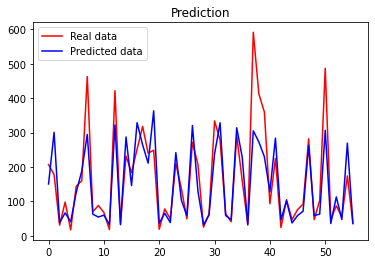

In [54]:
# Using the tuned model, we will now predict the number of deaths again
nn_gs_pred = nn_gs_model.predict(X_test_scaled)

# Again, we plot a graph to look at the difference between the real death data and the predicted death data
plt.plot(Y_test.values, color = 'red', label = 'Real data')
plt.plot(nn_gs_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

## Step 2.3 Performance Evaluation

Reference: 
1. https://indatalabs.com/blog/predictive-models-performance-evaluation-important
2. https://machinelearningmastery.com/regression-metrics-for-machine-learning/
3. https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

### Time Used

In [55]:
# Training the basic neural network model
print("Time taken for the training of neural network:\n", nn_time_used, " seconds or ", round(nn_time_used/60), " minutes")

# Time taken for the hyperparameters tuning of the neural network model
print("\nTime taken for the hyperparameters tuning of the neural network model\n", nn_gs_time_taken, 
      " seconds or ", round((nn_gs_time_taken) / 60), " minutes")

Time taken for the training of neural network:
 3.015995979309082  seconds or  0  minutes

Time taken for the hyperparameters tuning of the neural network model
 111.97831845283508  seconds or  2  minutes


### Mean Square Error

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset. The squaring also has the effect of inflating or magnifying large errors. That is, the larger the difference between the predicted and expected values, the larger the resulting squared positive error. This has the effect of “punishing” models more for larger errors when MSE is used as a loss function. It also has the effect of “punishing” models by inflating the average error score when used as a metric.

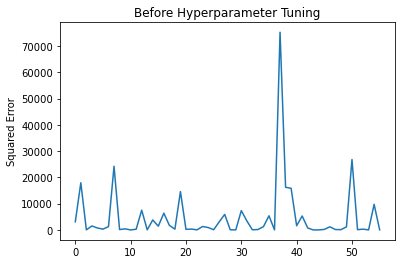

Mean square error before hyperparameters tuning:  4818.612737047222


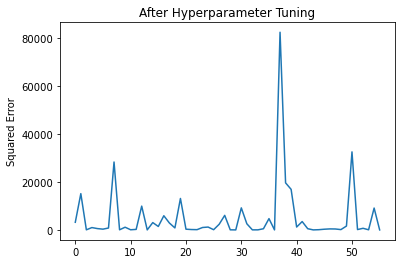

Mean square error after hyperparameters tuning:  5098.7185329488875


In [56]:
# Recall what we have:
## We make the predictions based on: X_test_scaled
## Real values: Y_test
## Predicted values: nn_pred, nn_gs_pred

# Calculate the errors before and after hyperparameters tuning
errors_before = list()
errors_after = list()
for i in range(len(Y_test.values)):
    # Calculate error
    err_before = (Y_test.values[i] - nn_pred[i])**2
    err_after = (Y_test.values[i] - nn_gs_pred[i])**2
    # Store error
    errors_before.append(err_before)
    errors_after.append(err_after)
    
    
# Plot the errors before hyperparameters tuning
plt.plot(errors_before)
plt.title("Before Hyperparameter Tuning")
#plt.xticks(ticks = [i for i in range(len(errors))], labels = nn_pred)
#plt.xlabel('Predicted Deaths')
plt.ylabel('Squared Error')
plt.show()

# Print the mean square error before hyperparameters tuning
nn_mse_before = mean_squared_error(Y_test.values, nn_pred)
print("Mean square error before hyperparameters tuning: ", nn_mse_before)

# Plot the errors after hyperparameters tuning
plt.plot(errors_after)
plt.title("After Hyperparameter Tuning")
#plt.xticks(ticks = [i for i in range(len(errors))], labels = nn_pred)
#plt.xlabel('Predicted Deaths')
plt.ylabel('Squared Error')
plt.show()

# Print the mean square error after hyperparameters tuning
nn_mse_after = mean_squared_error(Y_test.values, nn_gs_pred)
print("Mean square error after hyperparameters tuning: ", nn_mse_after)

### Root Mean Square Error

The Root Mean Squared Error, or RMSE, is an extension of the mean squared error.

Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.

In [57]:
# Find RMSE
nn_rmse_before = mean_squared_error(Y_test.values, nn_pred, squared = False)
nn_rmse_after = mean_squared_error(Y_test.values, nn_gs_pred, squared = False)
print("Root mean square error before hyperparameters tuning: ", nn_rmse_before)
print("Root mean square error after hyperparameters tuning: ", nn_rmse_after)

Root mean square error before hyperparameters tuning:  69.4162281966344
Root mean square error after hyperparameters tuning:  71.40531165780938


### Mean Absolute Error

Mean Absolute Error, or MAE, is a popular metric because, like RMSE, the units of the error score match the units of the target value that is being predicted.

Unlike the RMSE, the changes in MAE are linear and therefore intuitive.

That is, MSE and RMSE punish larger errors more than smaller errors, inflating or magnifying the mean error score. This is due to the square of the error value. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error.

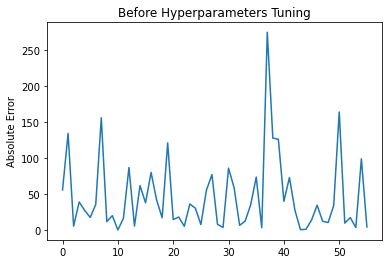

Mean absolute error:  45.85137483051845


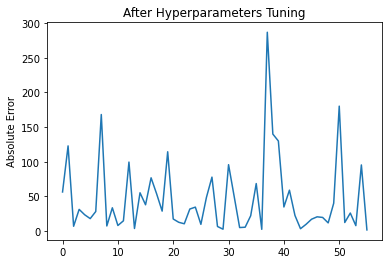

Mean absolute error:  46.62446222986494


In [58]:
# Calculate the errors
errors_before = list()
errors_after = list()
for i in range(len(Y_test.values)):
    # Calculate error
    err_before = abs((Y_test.values[i] - nn_pred[i]))
    err_after = abs((Y_test.values[i] - nn_gs_pred[i]))
    # Store error
    errors_before.append(err_before)
    errors_after.append(err_after)
    
# Plot errors before hyperparameters tuning
plt.plot(errors_before)
plt.title("Before Hyperparameters Tuning")
#plt.xticks(ticks = [i for i in range(len(errors))], labels = nn_pred)
#plt.xlabel('Predicted Value')
plt.ylabel('Absolute Error')
plt.show()

# Print the mean absolute error before hyperparameters tuning
nn_mae_before = mean_absolute_error(Y_test.values, nn_pred)
print("Mean absolute error: ", nn_mae_before)

# Plot errors after hyperparameters tuning
plt.plot(errors_after)
plt.title("After Hyperparameters Tuning")
#plt.xticks(ticks = [i for i in range(len(errors))], labels = nn_pred)
#plt.xlabel('Predicted Value')
plt.ylabel('Absolute Error')
plt.show()

# Print the mean absolute error after hyperparameters tuning
nn_mae_after = mean_absolute_error(Y_test.values, nn_gs_pred)
print("Mean absolute error: ", nn_mae_after)

# Part C: Conclusions

To compare the performance of both supervised learning techniques, we will observe the results obtained from different metrics. We will also observe the training speed of both supervised learning techniques.

In [60]:
lr_results = [lr_mse_after, lr_rmse_after, lr_mae_after, lr_time_used, md_time_used]
nn_results = [nn_mse_after, nn_rmse_after, nn_mae_after, nn_time_used , nn_gs_time_taken]

results = pd.DataFrame({"Linear Regression" : lr_results, "Neural Networks" : nn_results}, 
                       index = ["Mean Squared Error", "Root Mean Squared Error", "Mean Absolute Error", 
                                "Model Training Speed (seconds)", "GridSearchCV Training Speed (seconds)"])
results

,Linear Regression,Neural Networks
Mean Squared Error,4559.950807,5098.718533
Root Mean Squared Error,67.527408,71.405312
Mean Absolute Error,46.527755,46.624462
Model Training Speed (seconds),0.003986,3.015996
GridSearchCV Training Speed (seconds),1.956459,111.978318


**Performance:**

As seen from the table above, Linear Regression model has better performance than Neural Network model. From the view of MSE, RMSE and MAE, the results obtained from the metrics of Linear Regression Model are all lesser than Neural Network Model. From the graph (the difference between the predicted Y values and the real Y values) obtained, the predicted value are quite close to what the real data should be. However, both model fail to predict the sudden peak of amount of death during a particular period. Hence, as a conclusion, both models are performing considerable fine (errors obtained are not very big) in predicting the amount of death, given 17 features that we have chosen above, but both models are not sensitive enough to sense the sudden peak of amount of death.

**Training Speed:**

From the table above, we can see that Linear Regression model are very much faster in training speed than Neural Network model in term of model training speed and GridSearchCV training speed. This is expected as Neural Networks are much complex than Linear Regression model, and will only get more complicated when the number of hidden layers and the number of nodes in each layer increase. Here, we are using 3 hidden layers, and 32 nodes for each layer. The GridSearchCV has very slow training speed as there are many hyperparameters chosen to be tuned to get the optimal model.

**Conclusion:**

Given the results obtained, Linear Regression model can be said as a better model in predicting the number of death, given 17 features as listed above, than Neural Network model.